Import Libraries

In [106]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import clone
from sklearn.decomposition import PCA

from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier





Import Data

In [107]:
trainingData=pd.read_csv('data/train.csv', index_col='id')
#testingData=pd.read_csv('data/test.csv', index_col='id')

testingData=pd.read_csv('data/test.csv', index_col='id')
#testingData=pd.read_csv('data/test.csv', index_col='id')

#View All Data Columns
pd.set_option('display.max_columns',None)

In [108]:
trainingData.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [109]:
testingData.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [110]:
print("********** Checking missing values in Training Data **************** :",trainingData.isna().sum(),"\n ********************Checking complete***")
print("******************")
print("********** Checking missing values in Testing Data **************** :",testingData.isna().sum(),"\n ********************Checking complete***")

********** Checking missing values in Training Data **************** : loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64 
 ********************Checking complete***
******************
********** Checking missing values in Testing Data **************** : loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lO

In [111]:
#Checking duplicates values
print("********** Checking duplicates in training Data **************** :",trainingData.duplicated().sum()," \n ******Checking complete*** \n")

print("********** Checking duplicates in Testing Data **************** :",testingData.duplicated().sum()," \n ******Checking complete***")

********** Checking duplicates in training Data **************** : 0  
 ******Checking complete*** 

********** Checking duplicates in Testing Data **************** : 0  
 ******Checking complete***


In [112]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

Training Data Distribution

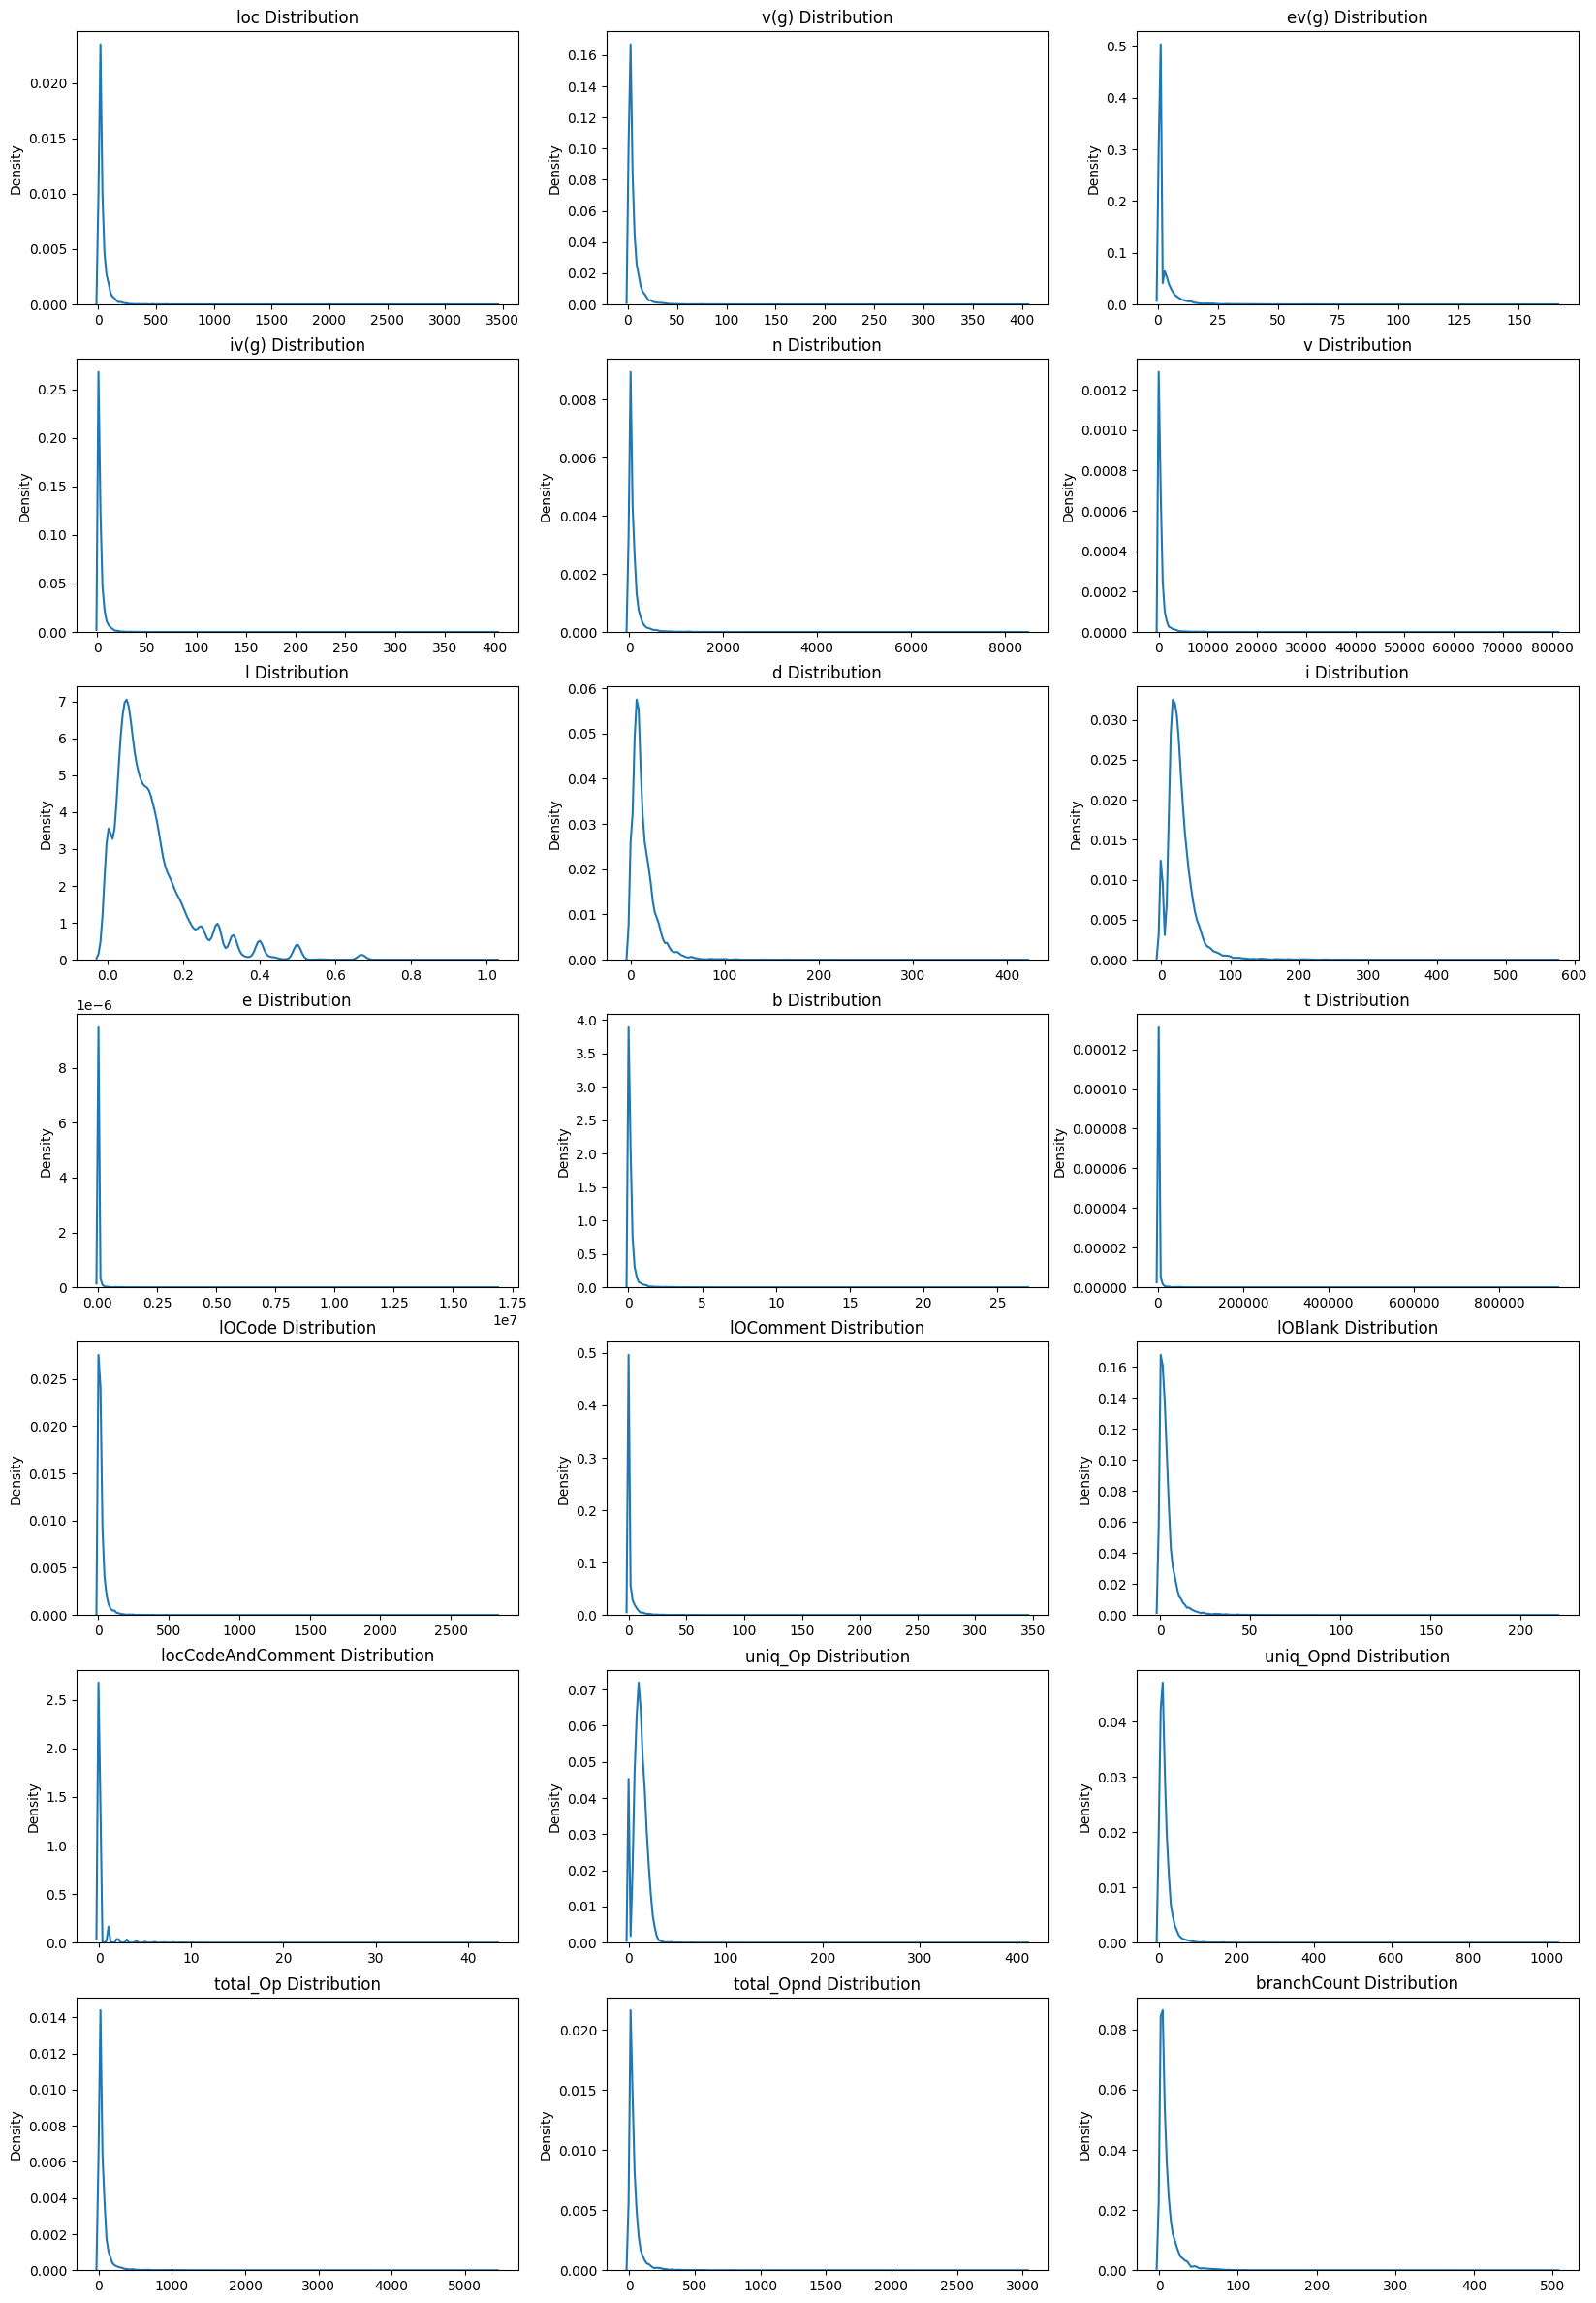

In [113]:
data = trainingData.copy()
label = data.pop('defects')
fig, ax = plt.subplots(7,3,figsize=(20,30))
ax = ax.flatten()
for i, column in enumerate(data):
    sns.kdeplot(data[column],ax=ax[i])
    ax[i].set_title(f"{column} Distribution")
    ax[i].set_xlabel(None)
plt.show()

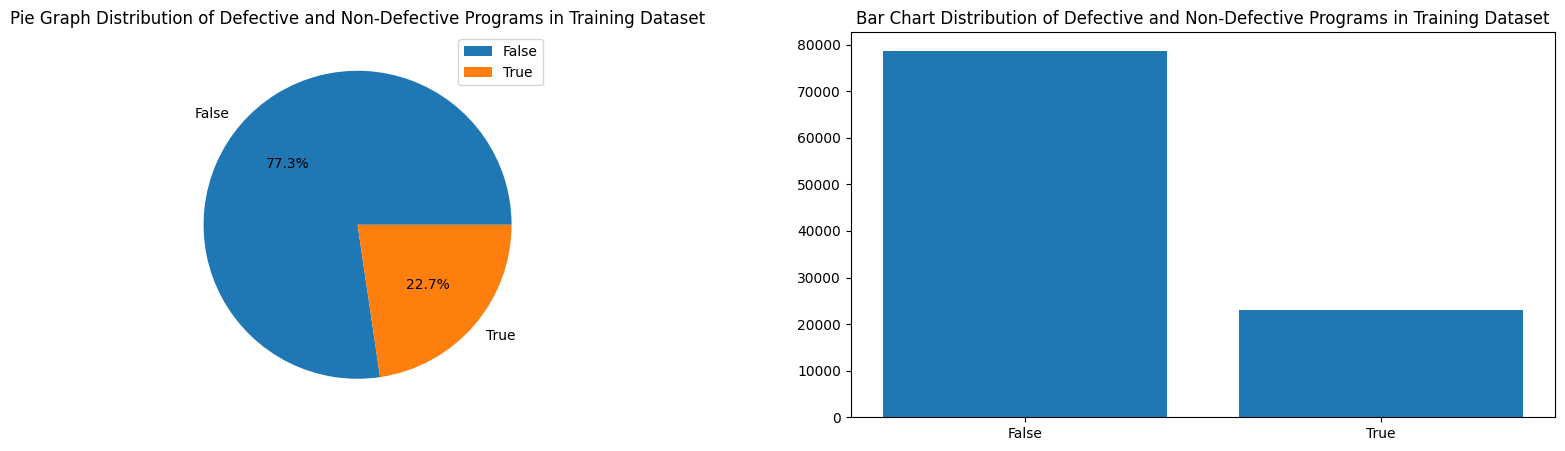

Total Number of Values: 101763
Number of Programs with Defects: 23064
Number of Programs without Defects:78699


In [114]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax.flatten()
ax[0].pie([trainingData['defects'].value_counts()[False],trainingData['defects'].value_counts()[True]],labels=["False","True"],autopct='%1.1f%%')
ax[0].legend()
ax[0].set_title("Pie Graph Distribution of Defective and Non-Defective Programs in Training Dataset")

ax[1].bar(["False","True"],[trainingData['defects'].value_counts()[False],trainingData['defects'].value_counts()[True]])
ax[1].set_title("Bar Chart Distribution of Defective and Non-Defective Programs in Training Dataset")
plt.show()

print(f"Total Number of Values: {trainingData['defects'].count()}")
print(f"Number of Programs with Defects: {trainingData['defects'].value_counts()[True]}")
print(f"Number of Programs without Defects:{trainingData['defects'].value_counts()[False]}")

Correlation Data

In [115]:
correlations = trainingData.corr()

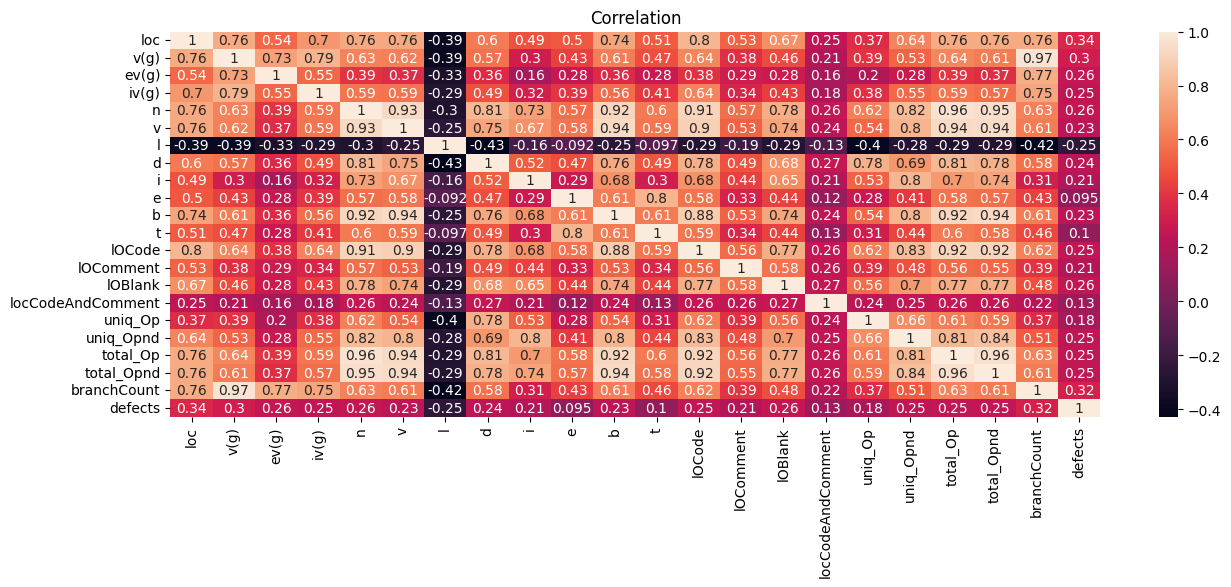

In [116]:
plt.figure(figsize=(15,5))
plt.title("Correlation")
sns.heatmap(correlations,annot=True,annot_kws = {'size' : 10})
plt.show()

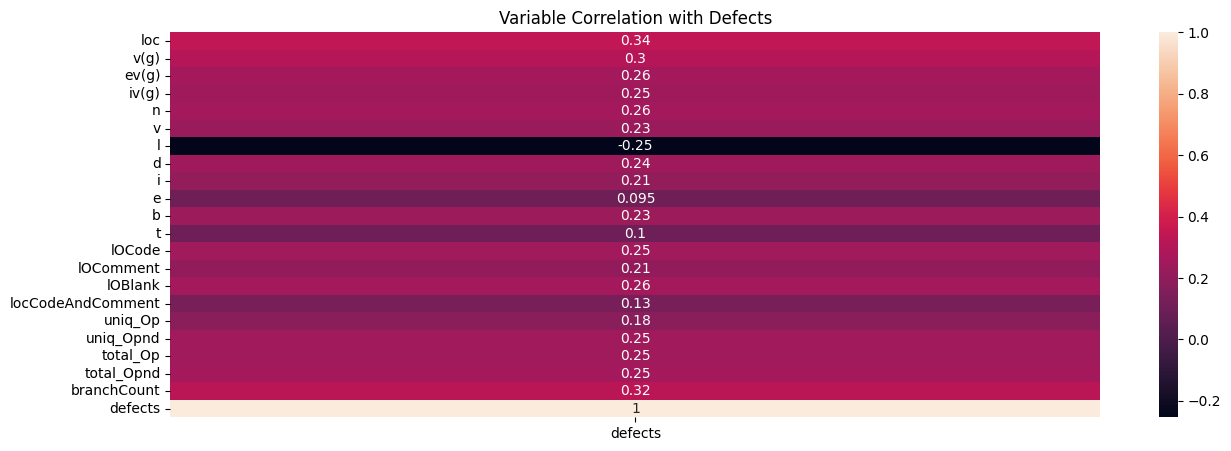

In [117]:
plt.figure(figsize=(15,5))
plt.title("Variable Correlation with Defects")
sns.heatmap(correlations[['defects']], annot=True)
plt.show()

In [118]:
# Replace False with 0 and True with 1 in the 'defects' column
trainingData['defects'] = trainingData['defects'].map({False: 0, True: 1})


Feature Selection

In [119]:
# Create a function to calculate VIF for all variables
threshold = 10
def calculate_vif(data_frame):
    to_drop = []
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) 
                       for i in range(data_frame.shape[1])]
     
    for i in range(vif_data.shape[0]):
          vif = vif_data.loc[i, "VIF"]
                        
          if vif > threshold:
            to_drop.append(vif_data.loc[i, "Variable"])
    return vif_data, to_drop
# Calculate VIF for the train dataset
vif_values, to_drop = calculate_vif(trainingData)

print("VIF Values for Training set:")
print(vif_values)

VIF Values for Training set:
             Variable        VIF
0                 loc   7.023452
1                v(g)  29.890746
2               ev(g)   3.738180
3               iv(g)   4.459707
4                   n  24.689889
5                   v  15.384746
6                   l   1.851483
7                   d  11.538139
8                   i   9.407622
9                   e   3.155956
10                  b  13.471010
11                  t   3.195427
12             lOCode  13.930293
13          lOComment   1.798953
14            lOBlank   4.546524
15  locCodeAndComment   1.160908
16            uniq_Op  11.277786
17          uniq_Opnd  10.462470
18           total_Op  28.514891
19         total_Opnd  28.862118
20        branchCount  30.729084
21            defects   1.535713


In [120]:
# Print out the columns to be dropped
print("The following columns have high VIF and will be dropped:")
print(to_drop)

# Drop the columns from the train and test sets
trainingData_cleaned = trainingData.drop(to_drop, axis=1)
testingData_cleaned = testingData.drop(to_drop, axis=1)

print("\n Training Data (Cleaned):")
print(trainingData_cleaned.head())

print("\n Testing Data (Cleaned):")
print(testingData_cleaned.head())

The following columns have high VIF and will be dropped:
['v(g)', 'n', 'v', 'd', 'b', 'lOCode', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

 Training Data (Cleaned):
     loc  ev(g)  iv(g)     l      i        e       t  lOComment  lOBlank  \
id                                                                         
0   22.0    1.0    2.0  0.06  14.25  5448.79  302.71          1        1   
1   14.0    1.0    2.0  0.14  21.11   936.71   52.04          0        1   
2   11.0    1.0    2.0  0.11  22.76  1754.01   97.45          0        1   
3    8.0    1.0    1.0  0.19  17.86   473.66   26.31          0        2   
4   11.0    1.0    2.0  0.18  12.44   365.67   20.31          0        2   

    locCodeAndComment  defects  
id                              
0                   0        0  
1                   0        0  
2                   0        0  
3                   0        1  
4                   0        0  

 Testing Data (Cleaned):
          loc  ev(g)  

Outllier Detection and Standardization

In [121]:
# Splitting the data into features (X) and the target variable (y)
X_train = trainingData_cleaned.drop(columns=["defects"])
y_train = trainingData_cleaned.defects


/tmp/ipykernel_3250/4280318044.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


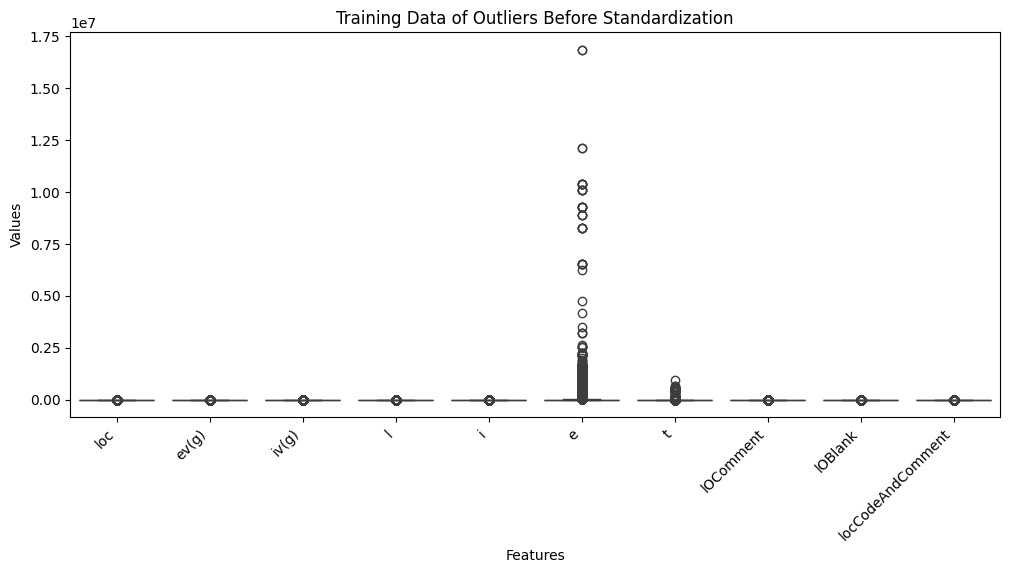

/tmp/ipykernel_3250/4280318044.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


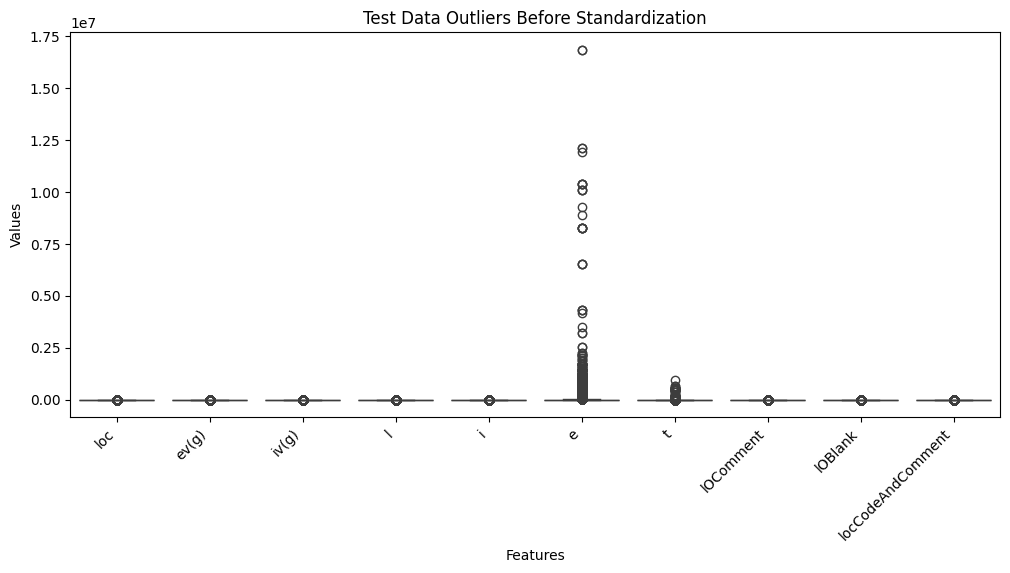

In [122]:

#Before Standardization

# Define a function to draw boxplots with outliers marked
def draw_boxplot_with_outliers(data, title):
    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data=data, showfliers=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

draw_boxplot_with_outliers(X_train, title='Training Data of Outliers Before Standardization')
draw_boxplot_with_outliers(testingData_cleaned, title='Test Data Outliers Before Standardization')


/tmp/ipykernel_3250/1849473018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


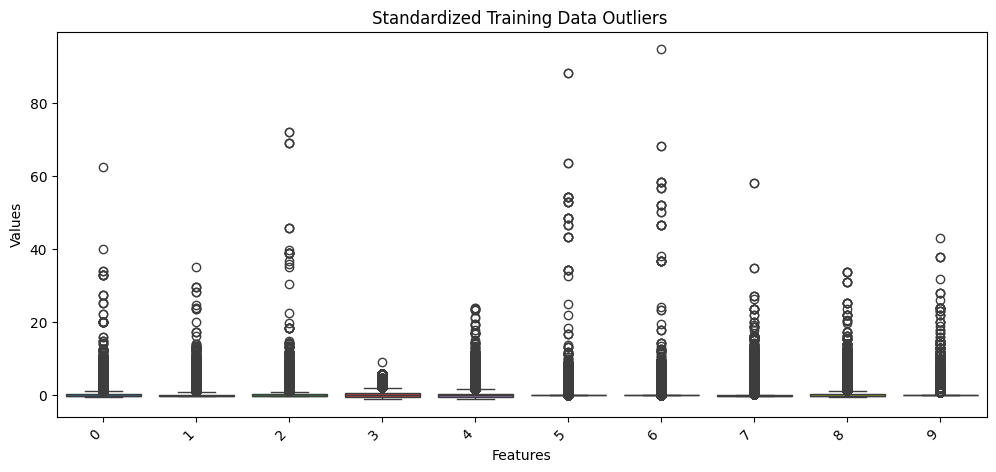

/tmp/ipykernel_3250/1849473018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


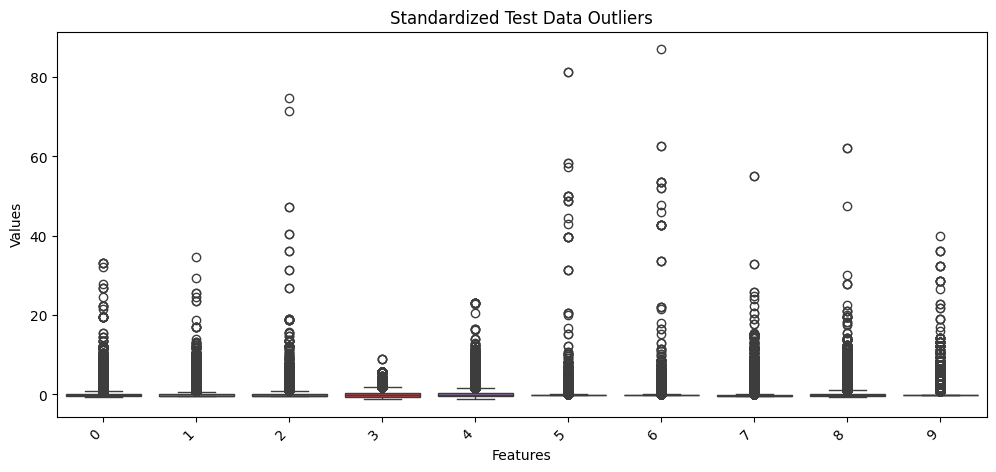

In [123]:
# Define a function to draw boxplots with outliers marked
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
TestingData_cleaned_standardized = scaler.fit_transform(testingData_cleaned)
    
def draw_boxplot_with_outliers(data, title):

    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data=data, showfliers=True)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

draw_boxplot_with_outliers(X_train, title='Standardized Training Data Outliers ')
draw_boxplot_with_outliers(TestingData_cleaned_standardized, title='Standardized Test Data Outliers')

Cross Validation for Finding the Best Model

In [124]:
#Calculates Each Model's Training and Validation ROC AUC Scores for Each Fold
#Display the mean ROC AUC scores (Training and Validation Scores)
def crossValidation(X, Y, model, model_name, rskf):
    #Copy Training Data to prevent modification
    X_copy = X.copy()
    Y_copy = Y.copy()
    
    #Initialize Scores and Validation Predictions
    training_scores, validation_scores, accuracy_scores, f1_scores=[],[],[],[]
    validation_predictions = np.zeros((len(X_copy)))
    
    for i, (train_index, validation_index) in enumerate(rskf.split(X,Y)):
        
        #Clone the model to prevent modification of input model
        m = clone(model)
        
        #Define Training and Validation Sets
        training_X, validation_X = X_copy[train_index], X_copy[validation_index]
        training_Y, validation_Y = Y_copy[train_index], Y_copy[validation_index]
        
        #Fit Model
        m.fit(training_X,training_Y)
        predicted_Y = m.predict(validation_X) 
        
        accuracy = accuracy_score(predicted_Y, validation_Y)
        f1 = f1_score(predicted_Y, validation_Y)
        
        training_prediction = m.predict_proba(training_X)[:,1]
        validation_prediction = m.predict_proba(validation_X)[:,1]

        validation_predictions[validation_index] += validation_prediction
        
        training_score = roc_auc_score(training_Y,training_prediction)
        validation_score = roc_auc_score(validation_Y, validation_prediction)
        
        training_scores.append(training_score)
        validation_scores.append(validation_score)
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
    print(f"Training Score: {np.round(np.mean(training_scores),decimals=7)}\tValidation Score: {np.round(np.mean(validation_scores),decimals=7)}\tAccuracy: {np.round(np.mean(accuracy_scores),decimals=7)}\tF1 Score: {np.round(np.mean(f1_scores),decimals=7)}\tModel: {model_name}")

    return training_scores, validation_scores, accuracy_scores, f1_scores

    

In [125]:
#Seed for Repetition
seed = 10
np.random.seed(seed)

#Create a Repeated K-Fold Cross Validator
rskf = RepeatedStratifiedKFold(random_state=seed)

In [126]:
%%script echo skipping

validation_scores = pd.DataFrame()

models = [
    ('gaussian_nb', GaussianNB()),
    ('bernoulli_nb', BernoulliNB()),
    ('knn', KNeighborsClassifier()),
    ('logistic_regression', LogisticRegression(random_state = seed)),
    ('random_forest', RandomForestClassifier(random_state = seed)),
    ('gradient_boosting', GradientBoostingClassifier(random_state = seed)),
    ('hist_gradient_boosting', HistGradientBoostingClassifier(random_state = seed)),
    ('lgbm', LGBMClassifier(random_state = seed)),
    ('xgb', XGBClassifier(random_state = seed)),
    ('cat_boost', CatBoostClassifier(random_state = seed,verbose=0)),
]

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in models:
    validation_scores[model_name] = crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)
    

skipping


In [127]:
%%script echo skipping
#Plot the Mean of the Validation Scores for Each Model 
validation_scores.mean().sort_values().plot(kind="barh",title="Validation Scores")

skipping


Find the Optimal Model through Adjusting Hyper Parameters 

In [128]:
optimalModel = []

Optimize Gaussian NB Through Var_Smoothing

In [129]:
%%script echo skipping

GNB = []
varSmooth = np.logspace(0,-9, num=100)

GNBTrainScores,GNBValScores,GNBAccuracyScores,GNBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(100):
    GNB.append(('GaussianNB_VS_'+str(varSmooth[i]), GaussianNB(var_smoothing=varSmooth[i])),)


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in GNB:
    GNBTrainScores[model_name],GNBValScores[model_name],GNBAccuracyScores[model_name],GNBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#GNBTrainScores.to_csv("data/Gaussian_NB/Gaussian_Training_Scores.csv",index=False)
#GNBValScores.to_csv("data/Gaussian_NB/Gaussian_Validation_Scores.csv",index=False)
#GNBAccuracyScores.to_csv("data/Gaussian_NB/Gaussian_Accuracy_Scores.csv",index=False)
#GNBF1Scores.to_csv("data/Gaussian_NB/Gaussian_F1_Scores.csv",index=False)

skipping


Top Model:GaussianNB_VS_1.0    0.77038
dtype: float64


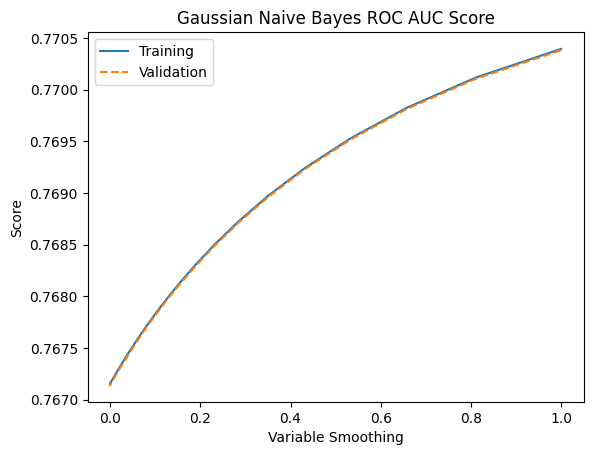

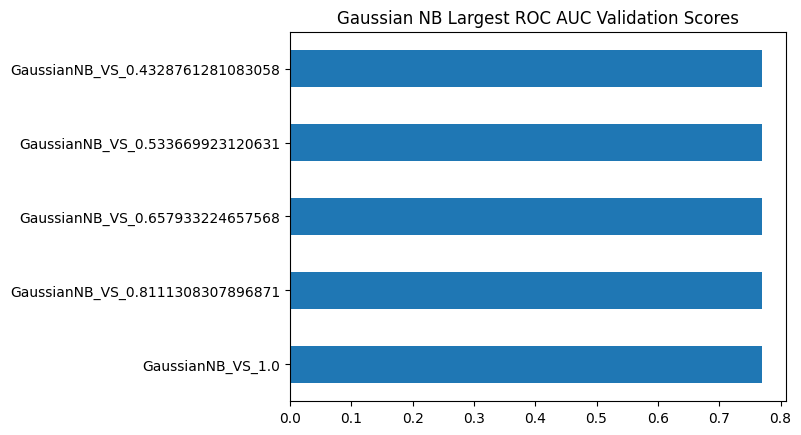

In [130]:
GNBTraining = pd.read_csv("data/Gaussian_NB/Gaussian_Training_Scores.csv")
GNBValidation = pd.read_csv("data/Gaussian_NB/Gaussian_Validation_Scores.csv")
varSmooth = np.logspace(0,-9, num=100)

print('Top Model:'+str(GNBValidation.mean().sort_values(ascending=False).head(1)))

plt.plot(varSmooth,GNBTraining.mean(),label='Training')
plt.plot(varSmooth,GNBValidation.mean(),label='Validation',linestyle='--')
plt.legend()
plt.xlabel('Variable Smoothing')
plt.ylabel('Score')
plt.title('Gaussian Naive Bayes ROC AUC Score')
plt.show()

GNBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Gaussian NB Largest ROC AUC Validation Scores")

#Add Gaussian Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('GaussianNB_VS_1.0',GaussianNB(var_smoothing=1.0)))


Bernoulli NB Optimization

In [131]:
%%script echo skipping
BNB = []
a = [.00001,.0001,.001,.01,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1,10]

BNBTrainScores,BNBValScores,BNBAccuracyScores,BNBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(a)):
    BNB.append(('BernoulliNB_Alpha_'+str(a[i]), BernoulliNB(alpha=a[i])),)


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in BNB:
    BNBTrainScores[model_name],BNBValScores[model_name],BNBAccuracyScores[model_name],BNBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#BNBTrainScores.to_csv("data/Bernoulli_NB/Bernoulli_Training_Scores.csv",index= False)
#BNBValScores.to_csv("data/Bernoulli_NB/Bernoulli_Validation_Scores.csv",index= False)
#BNBAccuracyScores.to_csv("data/Bernoulli_NB/Bernoulli_Accuracy_Scores.csv",index= False)
#BNBF1Scores.to_csv("data/Bernoulli_NB/Bernoulli_F1_Scores.csv",index= False)
    

skipping


Top Model:BernoulliNB_Alpha_0.25    0.760877
dtype: float64


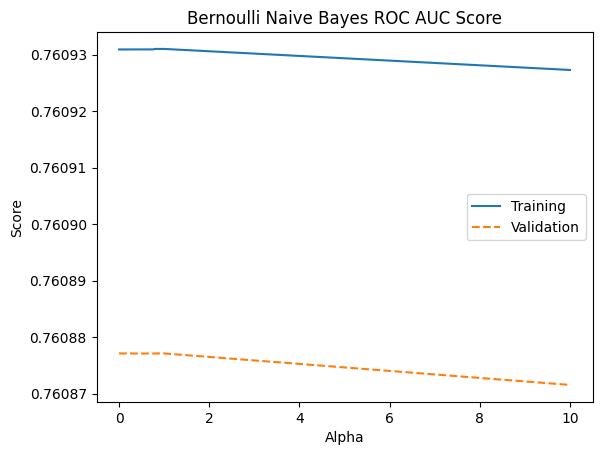

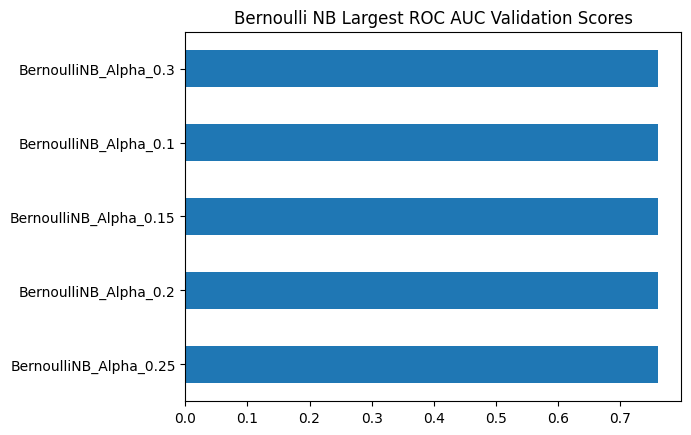

In [132]:
BNBTraining = pd.read_csv("data/Bernoulli_NB/Bernoulli_Training_Scores.csv")
BNBValidation = pd.read_csv("data/Bernoulli_NB/Bernoulli_Validation_Scores.csv")
a = [.00001,.0001,.001,.01,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1,10]

print('Top Model:'+str(BNBValidation.mean().sort_values(ascending=False).head(1)))

plt.plot(a,BNBTraining.mean(),label='Training')
plt.plot(a,BNBValidation.mean(),label='Validation',linestyle='--')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Bernoulli Naive Bayes ROC AUC Score')
plt.show()

BNBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Bernoulli NB Largest ROC AUC Validation Scores")

#Add Bernoulli Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('BernoulliNB_Alpha_0.25',BernoulliNB(alpha=0.25)))

Decision Tree Model Optimization

In [133]:
%%script echo skipping
criterion =['gini','entropy','log_loss']
depth = [2,3,4,5,6,7,8,9,10,11,12]
DTTrainScores,DTValScores,DTAccuracyScores,DTF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

DT =[]
for i in range(len(criterion)):
    DT.append(('decision_tree_'+str(criterion[i]),DecisionTreeClassifier(random_state=seed,criterion=criterion[i])))
    for j in range(len(depth)):
        DT.append(('decision_tree_'+str(criterion[i])+'_depth_'+str(depth[j]),DecisionTreeClassifier(random_state=seed,criterion=criterion[i],max_depth=depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in DT:
    DTTrainScores[model_name],DTValScores[model_name],DTAccuracyScores[model_name],DTF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)
    
#DTTrainScores.to_csv("data/Decision_Tree/Decision_Tree_Training_Scores.csv",index=False)
#DTValScores.to_csv("data/Decision_Tree/Decision_Tree_Validation_Scores.csv",index=False)
#DTAccuracyScores.to_csv("data/Decision_Tree/Decision_Tree_Accuracy_Scores.csv",index=False)
#DTF1Scores.to_csv("data/Decision_Tree/Decision_Tree_F1_Scores.csv",index=False)

skipping


Top Model:decision_tree_log_loss_depth_6    0.786512
dtype: float64


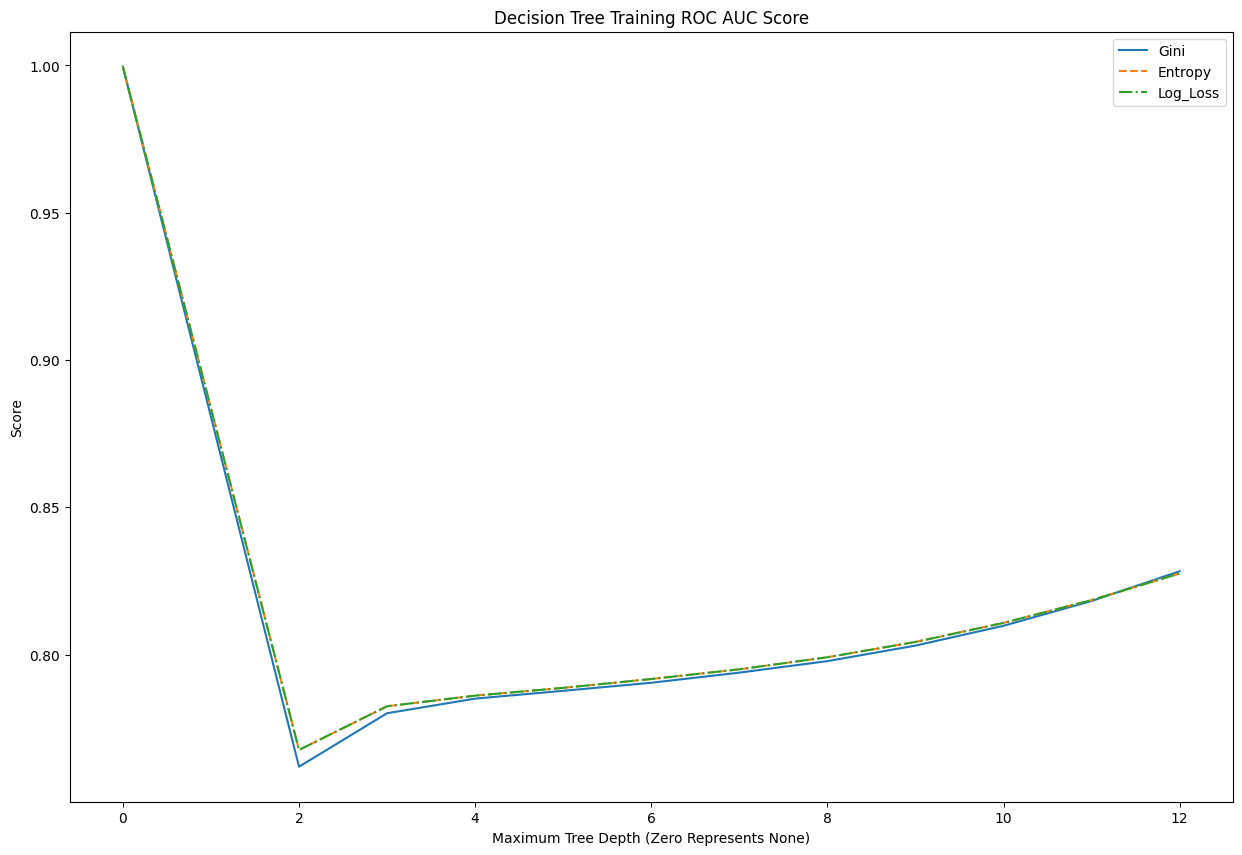

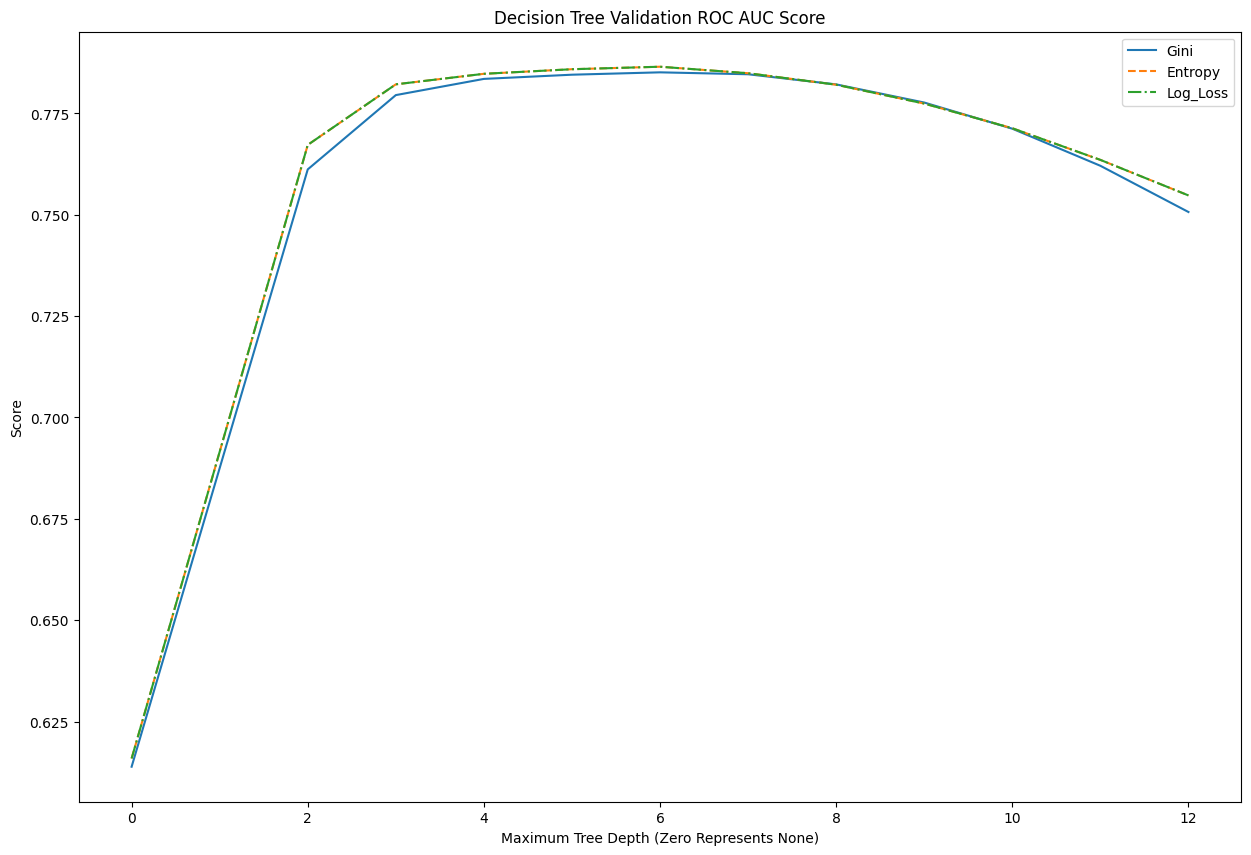

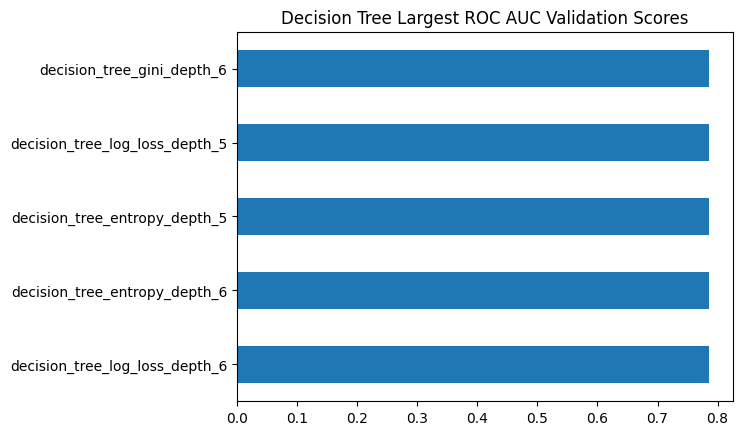

In [134]:
DTTraining = pd.read_csv("data/Decision_Tree/Decision_Tree_Training_Scores.csv")
DTValidation = pd.read_csv("data/Decision_Tree/Decision_Tree_Validation_Scores.csv")
depth = [0,2,3,4,5,6,7,8,9,10,11,12]

print('Top Model:'+str(DTValidation.mean().sort_values(ascending=False).head(1)))

plt.figure(figsize=(15,10))
plt.plot(depth,DTTraining.loc[:,'decision_tree_gini':'decision_tree_gini_depth_12'].mean(),label='Gini')
plt.plot(depth,DTTraining.loc[:,'decision_tree_entropy':'decision_tree_entropy_depth_12'].mean(),label='Entropy',linestyle='--')
plt.plot(depth,DTTraining.loc[:,'decision_tree_log_loss':'decision_tree_log_loss_depth_12'].mean(),label='Log_Loss',linestyle='-.')
plt.legend()
plt.xlabel('Maximum Tree Depth (Zero Represents None)')
plt.ylabel('Score')
plt.title('Decision Tree Training ROC AUC Score')
plt.show()

plt.figure(figsize=(15,10))
plt.plot(depth,DTValidation.loc[:,'decision_tree_gini':'decision_tree_gini_depth_12'].mean(),label='Gini')
plt.plot(depth,DTValidation.loc[:,'decision_tree_entropy':'decision_tree_entropy_depth_12'].mean(),label='Entropy',linestyle='--')
plt.plot(depth,DTValidation.loc[:,'decision_tree_log_loss':'decision_tree_log_loss_depth_12'].mean(),label='Log_Loss',linestyle='-.')
plt.legend()
plt.xlabel('Maximum Tree Depth (Zero Represents None)')
plt.ylabel('Score')
plt.title('Decision Tree Validation ROC AUC Score')
plt.show()


DTValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Decision Tree Largest ROC AUC Validation Scores")

#Add Decision Tree Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('decision_tree_log_loss_depth_6',DecisionTreeClassifier(random_state=seed,criterion='log_loss',max_depth=6)))

KNN Optimization

In [135]:
%%script echo skipping

KNN = []
neignbors = [1,2,3,4,5,6,7,8,9,10,11,12]

KNNTrainScores,KNNValScores,KNNAccuracyScores,KNNF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(neignbors)):
    KNN.append(('KNN_Neighbors_'+str(neignbors[i]), KNeighborsClassifier(n_neighbors=neignbors[i])),)


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in KNN:
    KNNTrainScores[model_name],KNNValScores[model_name],KNNAccuracyScores[model_name],KNNF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)
    
#KNNTrainScores.to_csv("data/KNeignbors/KNeignbors_Training_Scores.csv",index=False)
#KNNValScores.to_csv("data/KNeignbors/KNeignbors_Validation_Scores.csv",index=False)
#KNNAccuracyScores.to_csv("data/KNeignbors/KNeignbors_Accuracy_Scores.csv",index=False)
#KNNF1Scores.to_csv("data/KNeignbors/KNeignbors_F1_Scores.csv",index=False)

skipping


Top Model:KNN_Neighbors_12    0.75232
dtype: float64


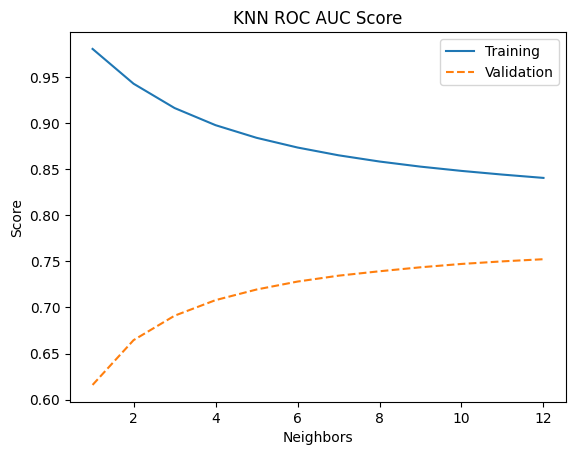

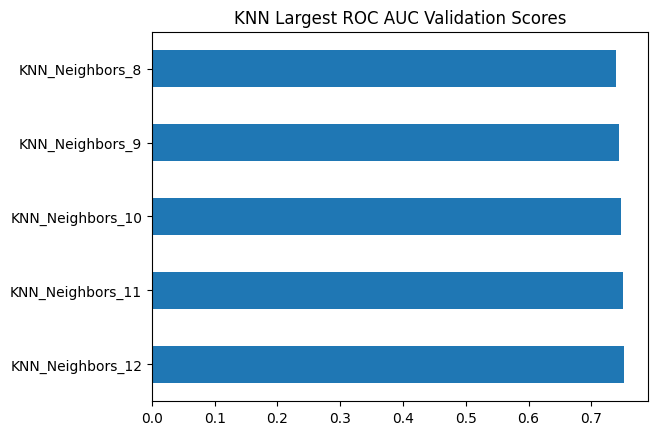

In [136]:
KNNTraining = pd.read_csv("data/KNeignbors/KNeignbors_Training_Scores.csv")
KNNValidation = pd.read_csv("data/KNeignbors/KNeignbors_Validation_Scores.csv")
neignbors = [1,2,3,4,5,6,7,8,9,10,11,12]

print('Top Model:'+str(KNNValidation.mean().sort_values(ascending=False).head(1)))

plt.plot(neignbors,KNNTraining.mean(),label='Training')
plt.plot(neignbors,KNNValidation.mean(),label='Validation',linestyle='--')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('KNN ROC AUC Score')
plt.show()

KNNValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="KNN Largest ROC AUC Validation Scores")

#Add KNN Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('KNN_Neignbors_12',KNeighborsClassifier(n_neighbors=12)))

Logistic Regression

In [137]:
%%script echo skipping

LGR = []
solvers = ['lbfgs', 'newton-cg','liblinear']
c_values = [.01, .1, 1.0, 10, 100]

LGRTrainScores,LGRValScores,LGRAccuracyScores,LGRF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for s in range(3):
    for c in range(5):
        LGR.append(('logistic_regression_solver_'+str(solvers[s])+'_c_'+str(c_values[c]), LogisticRegression(random_state=seed, solver=solvers[s],C=c_values[c]),))
    


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in LGR:
    LGRTrainScores[model_name],LGRValScores[model_name],LGRAccuracyScores[model_name],LGRF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model),model_name, rskf)
    
#LGRTrainScores.to_csv("data/Logistic_Regression/Logistic_Regression_Training_Scores.csv",index=False)
#LGRValScores.to_csv("data/Logistic_Regression/Logistic_Regression_Validation_Scores.csv",index=False)
#LGRAccuracyScores.to_csv("data/Logistic_Regression/Logistic_Regression_Accuracy_Scores.csv",index=False)
#LGRF1Scores.to_csv("data/Logistic_Regression/Logistic_Regression_F1_Scores.csv",index=False)

skipping


Top Model:logistic_regression_solver_liblinear_c_100    0.778059
dtype: float64


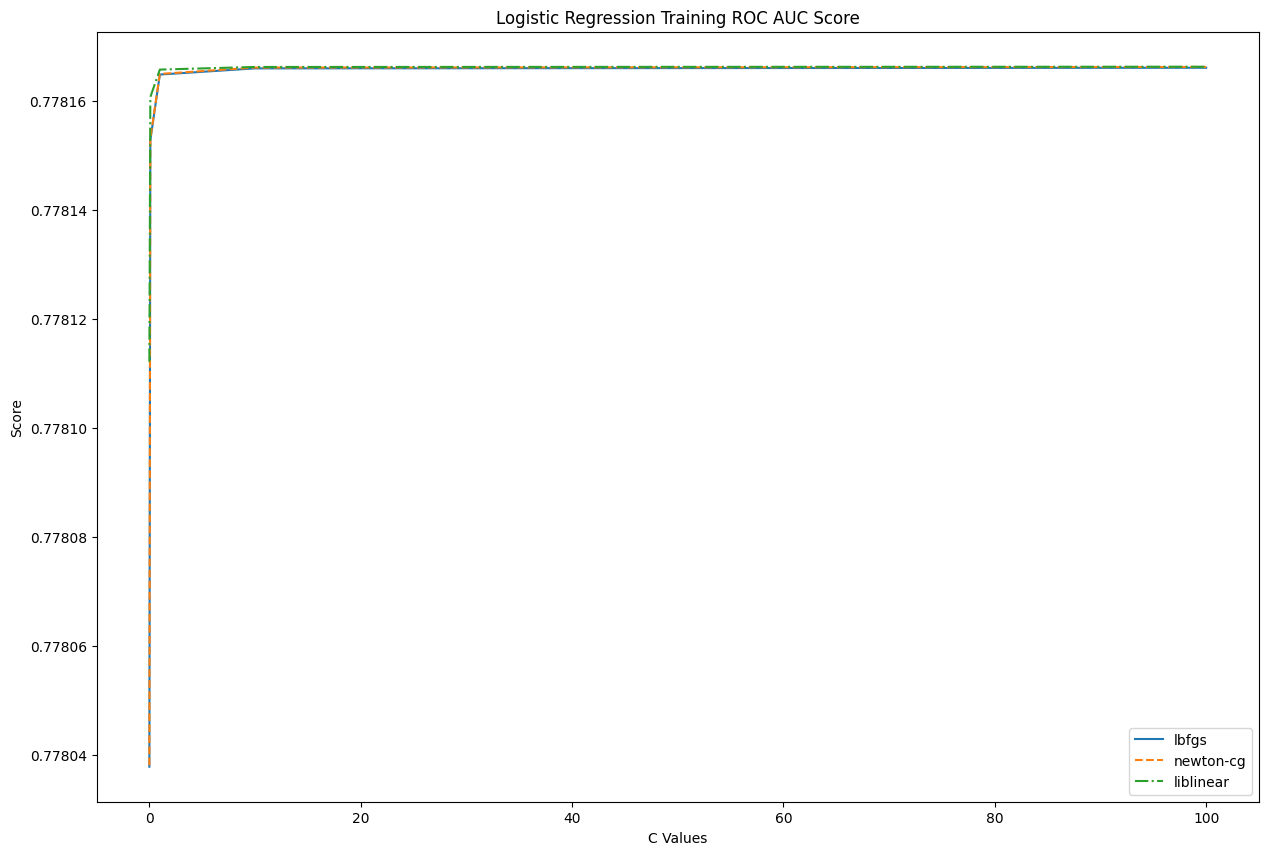

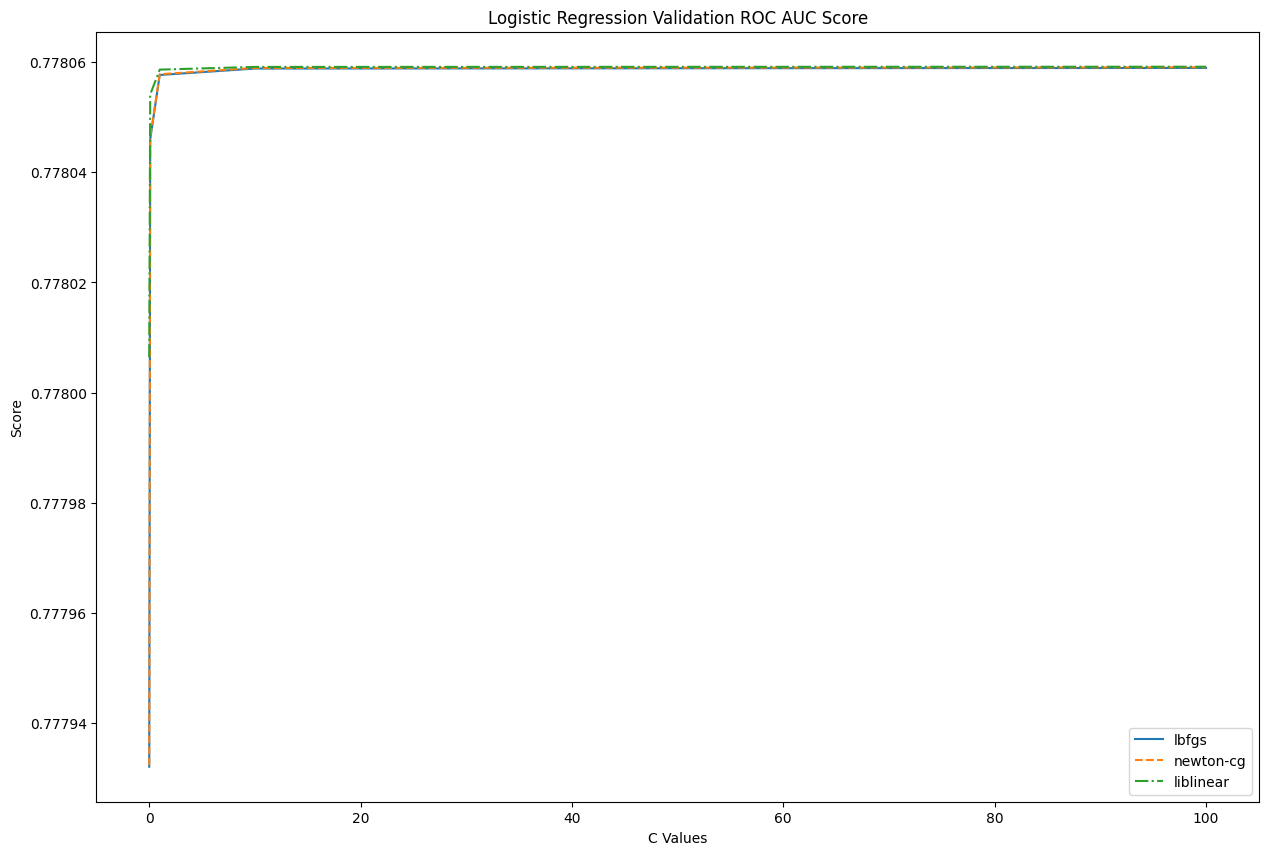

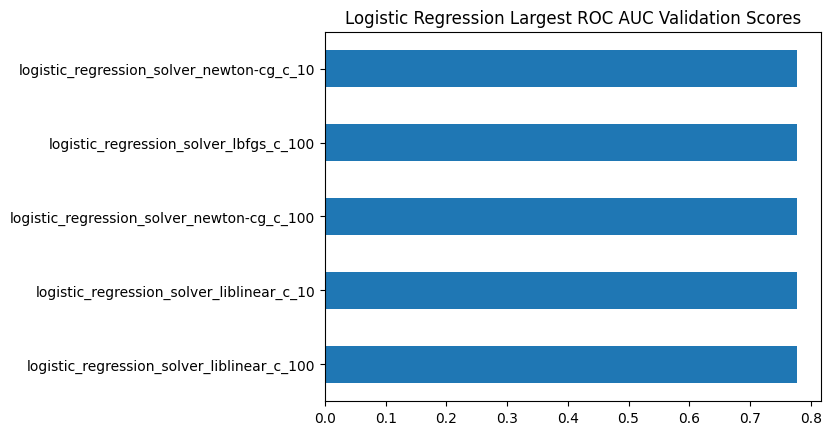

In [138]:
LGRTraining = pd.read_csv("data/Logistic_Regression/Logistic_Regression_Training_Scores.csv")
LGRValidation = pd.read_csv("data/Logistic_Regression/Logistic_Regression_Validation_Scores.csv")
solvers = ['lbfgs', 'newton-cg','liblinear']
c_values = [.01, .1, 1.0, 10, 100]

print('Top Model:'+str(LGRValidation.mean().sort_values(ascending=False).head(1)))

plt.figure(figsize=(15,10))
plt.plot(c_values,LGRTraining.loc[:,'logistic_regression_solver_lbfgs_c_0.01':'logistic_regression_solver_lbfgs_c_100'].mean(),label='lbfgs')
plt.plot(c_values,LGRTraining.loc[:,'logistic_regression_solver_newton-cg_c_0.01':'logistic_regression_solver_newton-cg_c_100'].mean(),label='newton-cg',linestyle='--')
plt.plot(c_values,LGRTraining.loc[:,'logistic_regression_solver_liblinear_c_0.01':'logistic_regression_solver_liblinear_c_100'].mean(),label='liblinear',linestyle='-.')
plt.legend()
plt.xlabel('C Values')
plt.ylabel('Score')
plt.title('Logistic Regression Training ROC AUC Score')
plt.show()

plt.figure(figsize=(15,10))
plt.plot(c_values,LGRValidation.loc[:,'logistic_regression_solver_lbfgs_c_0.01':'logistic_regression_solver_lbfgs_c_100'].mean(),label='lbfgs')
plt.plot(c_values,LGRValidation.loc[:,'logistic_regression_solver_newton-cg_c_0.01':'logistic_regression_solver_newton-cg_c_100'].mean(),label='newton-cg',linestyle='--')
plt.plot(c_values,LGRValidation.loc[:,'logistic_regression_solver_liblinear_c_0.01':'logistic_regression_solver_liblinear_c_100'].mean(),label='liblinear',linestyle='-.')
plt.legend()
plt.xlabel('C Values')
plt.ylabel('Score')
plt.title('Logistic Regression Validation ROC AUC Score')
plt.show()


LGRValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Logistic Regression Largest ROC AUC Validation Scores")

#Add Logistic Regression Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('logistic_regression_solver_liblinear_c_100',LogisticRegression(random_state=seed, solver='liblinear',C=100)))


Random Forest

In [139]:
%%script echo skipping

RF = [('random_forest_max_features_sqrt',RandomForestClassifier(random_state=seed)),('random_forest_max_features_log2',RandomForestClassifier(random_state=seed,max_features='log2'))]
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
max_features = ['log2', 'sqrt'] # number of features in consideration at every split

RFTrainScores,RFValScores,RFAccuracyScores,RFF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()


for i in range(len(max_depth)):
    for j in range(len(max_features)):
        RF.append(('random_forest_maxDepth_'+str(max_depth[i])+'_maxFeatures_'+max_features[j], RandomForestClassifier(random_state=seed,max_depth=max_depth[i],max_features=max_features[j]),))
    


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in RF:
    RFTrainScores[model_name],RFValScores[model_name],RFAccuracyScores[model_name],RFF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model),model_name, rskf)
    
#RFTrainScores.to_csv("data/Random_Forest/Random_Forest_Training_Scores.csv",index=False)
#RFValScores.to_csv("data/Random_Forest/Random_Forest_Validation_Scores.csv",index=False)
#RFAccuracyScores.to_csv("data/Random_Forest/Random_Forest_Accuracy_Scores.csv",index=False)
#RFF1Scores.to_csv("data/Random_Forest/Random_Forest_F1_Scores.csv",index=False)

skipping


Top Model:random_forest_maxDepth_10_maxFeatures_sqrt    0.790596
dtype: float64


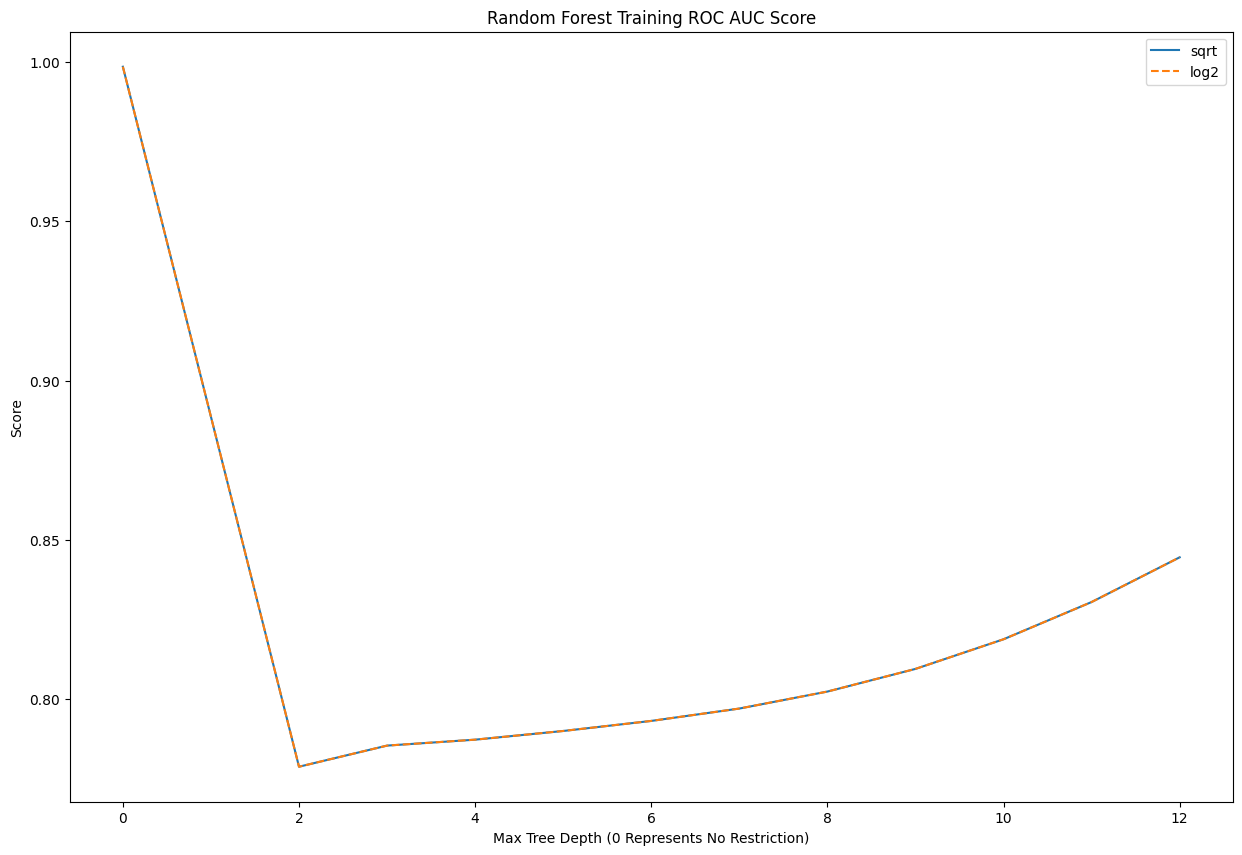

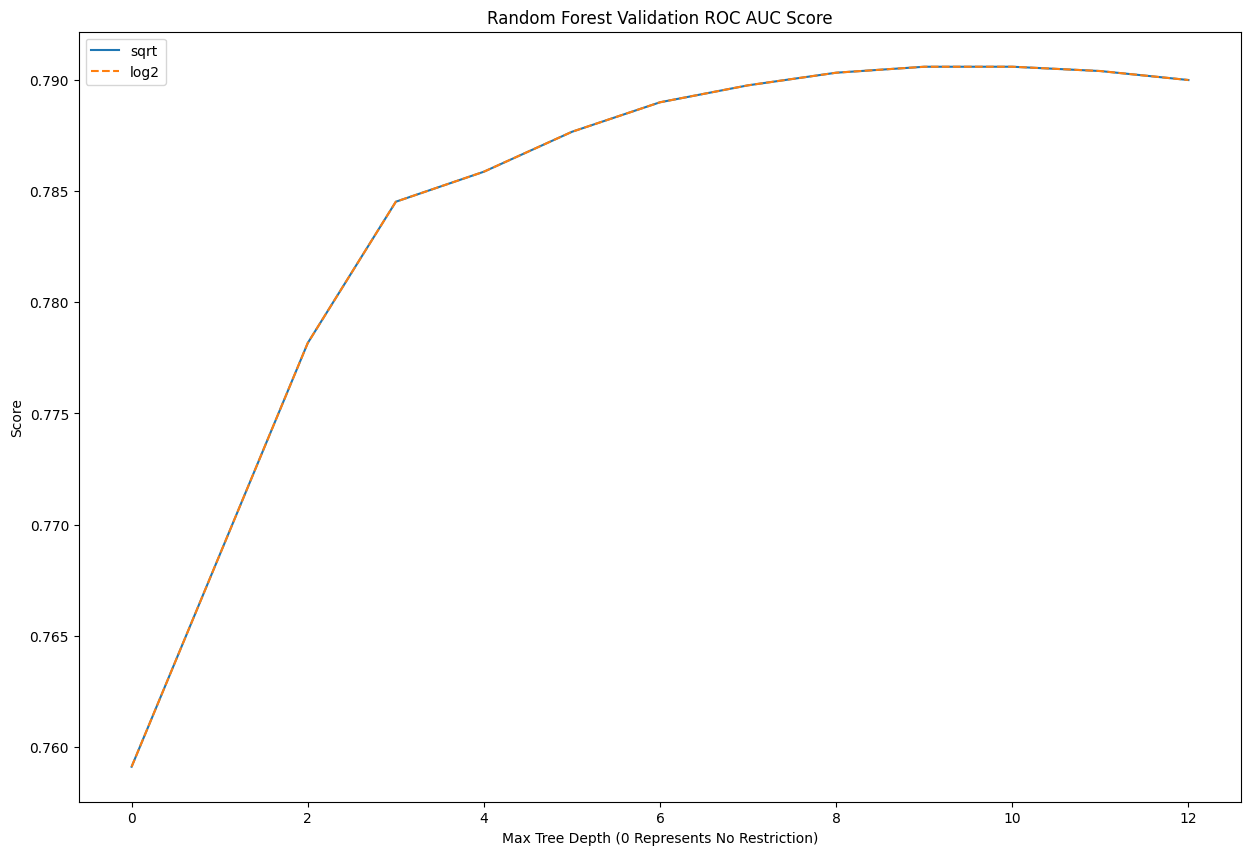

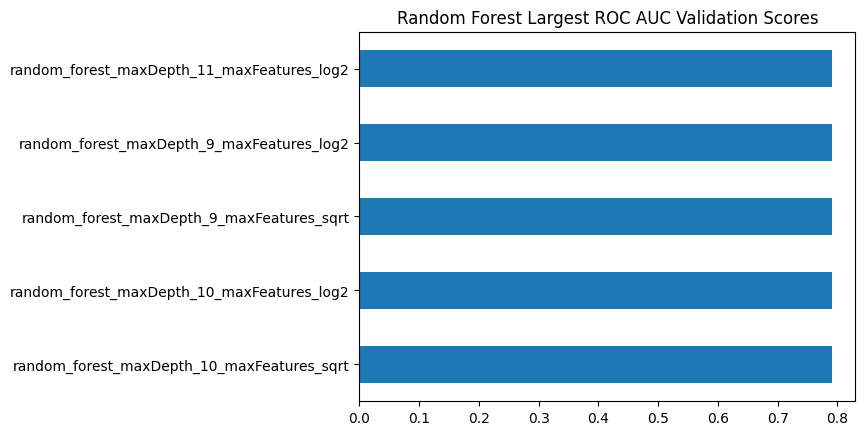

In [140]:
RFTraining = pd.read_csv("data/Random_Forest/Random_Forest_Training_Scores.csv")
RFValidation = pd.read_csv("data/Random_Forest/Random_Forest_Validation_Scores.csv")
max_depth = [0,2,3,4,5,6,7,8,9,10,11,12]
max_features = ['log2', 'sqrt']

print('Top Model:'+str(RFValidation.mean().sort_values(ascending=False).head(1)))

plt.figure(figsize=(15,10))
plt.plot(max_depth,RFTraining.loc[:,['random_forest_max_features_sqrt','random_forest_maxDepth_2_maxFeatures_sqrt','random_forest_maxDepth_3_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_4_maxFeatures_sqrt','random_forest_maxDepth_5_maxFeatures_sqrt','random_forest_maxDepth_6_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_7_maxFeatures_sqrt','random_forest_maxDepth_8_maxFeatures_sqrt','random_forest_maxDepth_9_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_10_maxFeatures_sqrt','random_forest_maxDepth_11_maxFeatures_sqrt','random_forest_maxDepth_12_maxFeatures_sqrt']].mean(),label='sqrt')

plt.plot(max_depth,RFTraining.loc[: ,['random_forest_max_features_log2',             'random_forest_maxDepth_2_maxFeatures_log2',    'random_forest_maxDepth_3_maxFeatures_log2'
                                    ,'random_forest_maxDepth_4_maxFeatures_log2',   'random_forest_maxDepth_5_maxFeatures_log2',    'random_forest_maxDepth_6_maxFeatures_log2'
                                    ,'random_forest_maxDepth_7_maxFeatures_log2',   'random_forest_maxDepth_8_maxFeatures_log2',    'random_forest_maxDepth_9_maxFeatures_log2'
                                    ,'random_forest_maxDepth_10_maxFeatures_log2',  'random_forest_maxDepth_11_maxFeatures_log2',   'random_forest_maxDepth_12_maxFeatures_log2']].mean(),label='log2',linestyle='--')
plt.legend()
plt.xlabel('Max Tree Depth (0 Represents No Restriction)')
plt.ylabel('Score')
plt.title('Random Forest Training ROC AUC Score')
plt.show()

plt.figure(figsize=(15,10))
plt.plot(max_depth,RFValidation.loc[:,['random_forest_max_features_sqrt','random_forest_maxDepth_2_maxFeatures_sqrt','random_forest_maxDepth_3_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_4_maxFeatures_sqrt','random_forest_maxDepth_5_maxFeatures_sqrt','random_forest_maxDepth_6_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_7_maxFeatures_sqrt','random_forest_maxDepth_8_maxFeatures_sqrt','random_forest_maxDepth_9_maxFeatures_sqrt'
                                  ,'random_forest_maxDepth_10_maxFeatures_sqrt','random_forest_maxDepth_11_maxFeatures_sqrt','random_forest_maxDepth_12_maxFeatures_sqrt']].mean(),label='sqrt')

plt.plot(max_depth,RFValidation.loc[: ,['random_forest_max_features_log2',            'random_forest_maxDepth_2_maxFeatures_log2',    'random_forest_maxDepth_3_maxFeatures_log2'
                                        ,'random_forest_maxDepth_4_maxFeatures_log2', 'random_forest_maxDepth_5_maxFeatures_log2',    'random_forest_maxDepth_6_maxFeatures_log2'
                                        ,'random_forest_maxDepth_7_maxFeatures_log2', 'random_forest_maxDepth_8_maxFeatures_log2',    'random_forest_maxDepth_9_maxFeatures_log2'
                                        ,'random_forest_maxDepth_10_maxFeatures_log2','random_forest_maxDepth_11_maxFeatures_log2',   'random_forest_maxDepth_12_maxFeatures_log2']].mean(),label='log2',linestyle='--')
plt.legend()
plt.xlabel('Max Tree Depth (0 Represents No Restriction)')
plt.ylabel('Score')
plt.title('Random Forest Validation ROC AUC Score')
plt.show()


RFValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Random Forest Largest ROC AUC Validation Scores")

#Add Random Forest Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('random_forest_maxDepth_10_maxFeatures_sqrt',RandomForestClassifier(random_state=seed,max_depth=10,max_features='sqrt')))

Hist Gradient Boosting

In [141]:
%%script echo skipping

HGB =[('hist_gradient_boosting',HistGradientBoostingClassifier(random_state = seed))]
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)
HGBTrainScores,HGBValScores,HGBAccuracyScores,HGBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(learning_rate)):
    for j in range(len(max_depth)):
        HGB.append(('hist_gradient_boosting_lr_'+str(learning_rate[i])+'_depth_'+str(max_depth[j]),HistGradientBoostingClassifier(random_state = seed,learning_rate=learning_rate[i],max_depth=max_depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in HGB:
    HGBTrainScores[model_name],HGBValScores[model_name],HGBAccuracyScores[model_name],HGBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#HGBTrainScores.to_csv("data/Hist_Gradient/Hist_Gradient_Training_Scores.csv",index=False)
#HGBValScores.to_csv("data/Hist_Gradient/Hist_Gradient_Validation_Scores.csv",index=False)
#HGBAccuracyScores.to_csv("data/Hist_Gradient/Hist_Gradient_Accuracy_Scores.csv",index=False)
#HGBF1Scores.to_csv("data/Hist_Gradient/Hist_Gradient_F1_Scores.csv",index=False)

skipping


Top Model:hist_gradient_boosting_lr_0.04941713361323833_depth_5    0.791031
dtype: float64


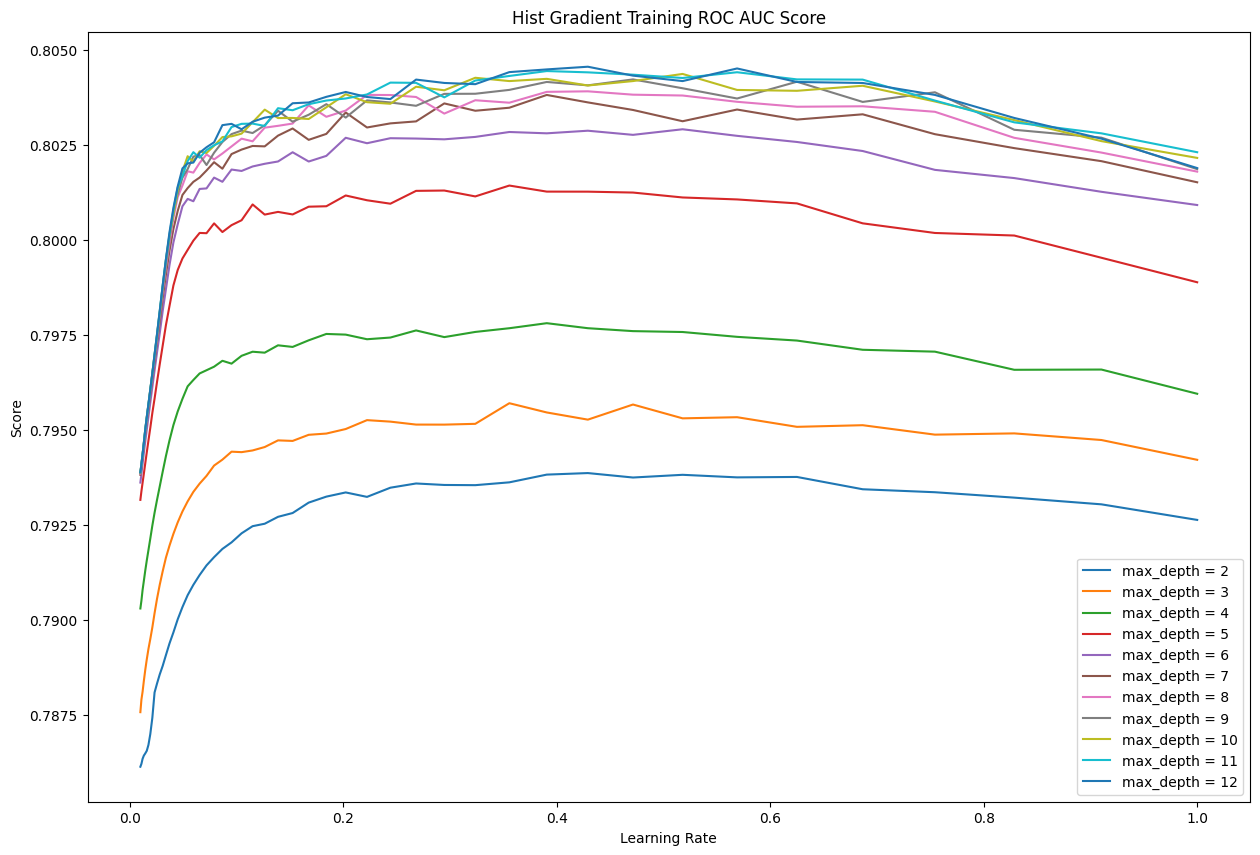

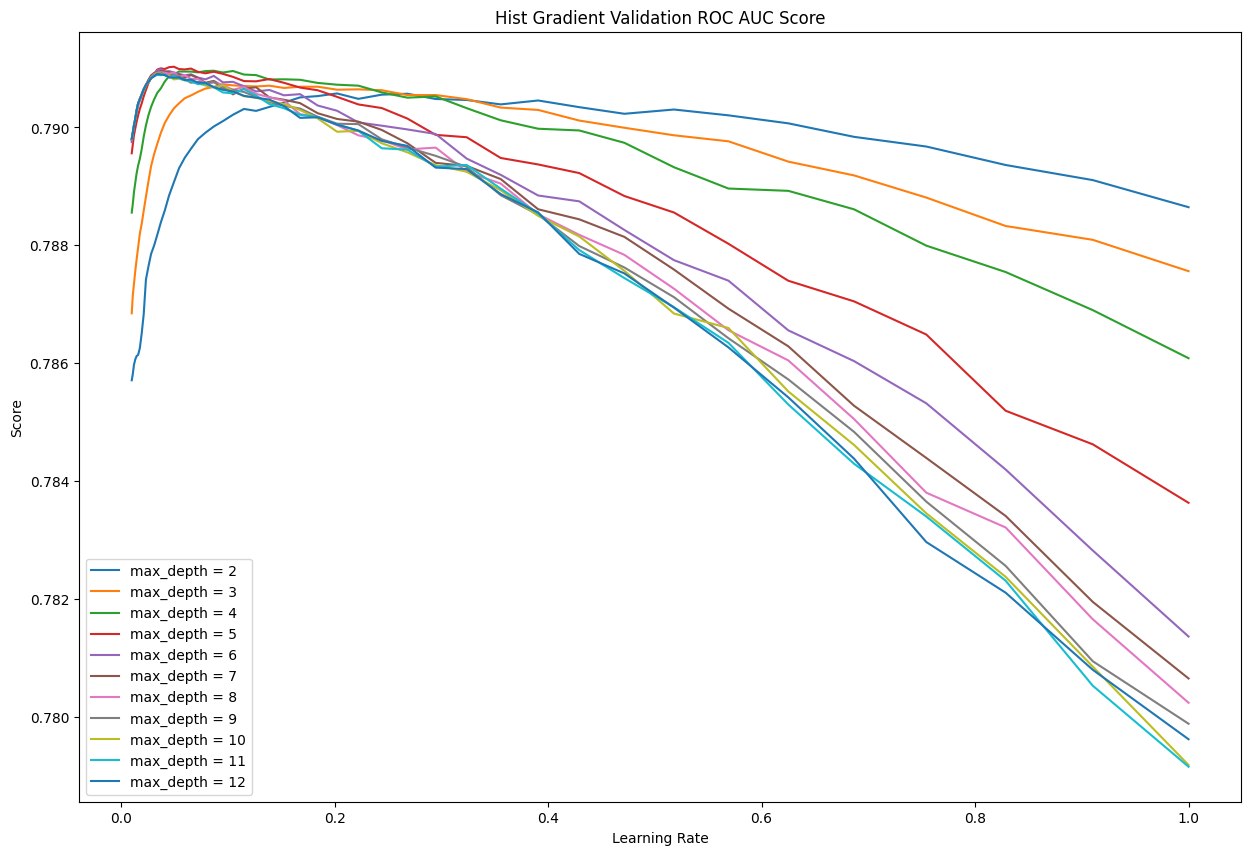

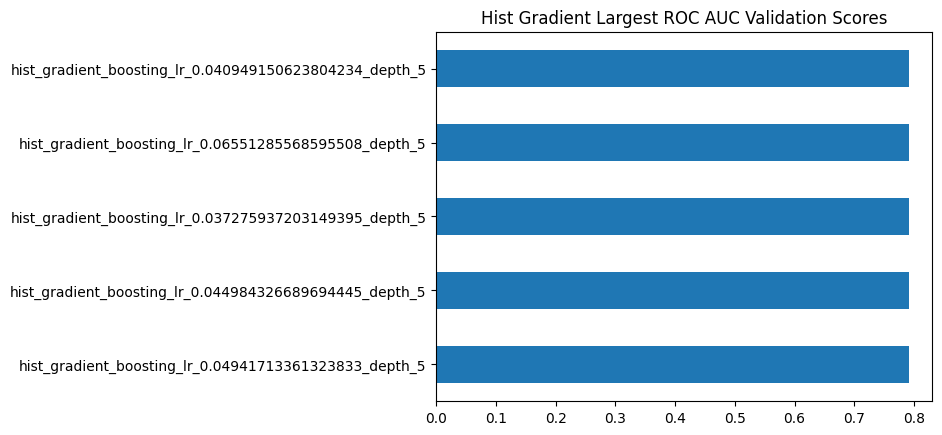

In [142]:
HGBTraining = pd.read_csv("data/Hist_Gradient/Hist_Gradient_Training_Scores.csv")
HGBValidation = pd.read_csv("data/Hist_Gradient/Hist_Gradient_Validation_Scores.csv")
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)

print('Top Model:'+str(HGBValidation.mean().sort_values(ascending=False).head(1)))

plt.figure(figsize=(15,10))
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_2':'hist_gradient_boosting_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_3':'hist_gradient_boosting_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_4':'hist_gradient_boosting_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_5':'hist_gradient_boosting_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_6':'hist_gradient_boosting_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_7':'hist_gradient_boosting_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_8':'hist_gradient_boosting_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_9':'hist_gradient_boosting_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_10':'hist_gradient_boosting_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_11':'hist_gradient_boosting_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
plt.plot(learning_rate,HGBTraining.loc[:,'hist_gradient_boosting_lr_0.01_depth_12':'hist_gradient_boosting_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Hist Gradient Training ROC AUC Score')
plt.show()

plt.figure(figsize=(15,10))
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_2':'hist_gradient_boosting_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_3':'hist_gradient_boosting_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_4':'hist_gradient_boosting_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_5':'hist_gradient_boosting_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_6':'hist_gradient_boosting_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_7':'hist_gradient_boosting_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_8':'hist_gradient_boosting_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_9':'hist_gradient_boosting_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_10':'hist_gradient_boosting_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_11':'hist_gradient_boosting_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
plt.plot(learning_rate,HGBValidation.loc[:,'hist_gradient_boosting_lr_0.01_depth_12':'hist_gradient_boosting_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Hist Gradient Validation ROC AUC Score')
plt.show()


HGBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Hist Gradient Largest ROC AUC Validation Scores")

#Add Hist Gradient Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('hist_gradient_boosting_lr_0.04941713361323833_depth_5',HistGradientBoostingClassifier(random_state=seed,learning_rate=0.04941713361323833,max_depth=5)))

LGBM

In [143]:
%%script echo skipping

LGBM =[('lgbm',LGBMClassifier(random_state = seed))]
max_depth = [3,4,5,6,7,8,9,10,11,12]

LGBMTrainScores,LGBMValScores,LGBMAccuracyScores,LGBMF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()


for i in range(len(max_depth)):
    leafNum = np.linspace(np.floor( ( (np.power(2,max_depth[i])) )/10 ), ( np.power(2,max_depth[i]) ), 10, dtype=int)
    leafNum = list(filter(lambda x: x>1,leafNum))
    for j in range(len(leafNum)):
        LGBM.append(('lgbm_maxDepth_'+str(max_depth[i])+'_leafNum_'+str(leafNum[j]),LGBMClassifier(random_state = seed,max_depth=max_depth[i],num_leaves=leafNum[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 

for (model_name, model) in LGBM:
    LGBMTrainScores[model_name],LGBMValScores[model_name],LGBMAccuracyScores[model_name],LGBMF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#LGBMTrainScores.to_csv("data/LGBM/LGBM_Training_Scores.csv",index=False)
#LGBMValScores.to_csv("data/LGBM/LGBM_Validation_Scores.csv",index=False)
#LGBMAccuracyScores.to_csv("data/LGBM/LGBM_Accuracy_Scores.csv",index=False)
#LGBMF1Scores.to_csv("data/LGBM/LGBM_F1_Scores.csv",index=False)

skipping


Top Model:lgbm_maxDepth_4_leafNum_14    0.791105
dtype: float64


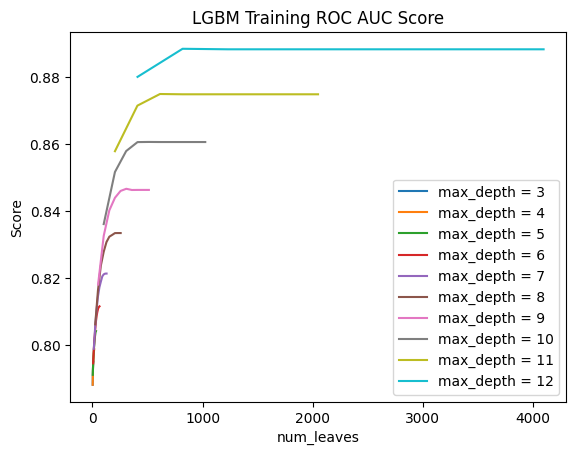

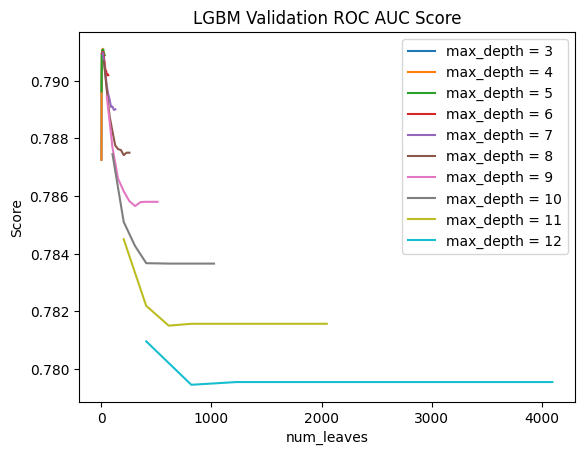

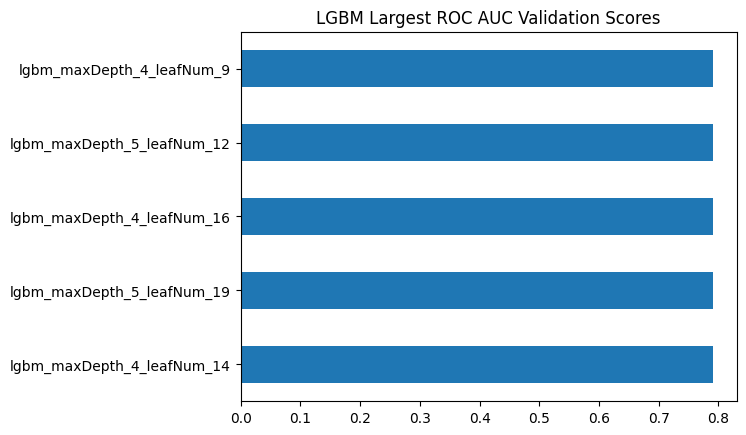

In [144]:
LGBMTraining = pd.read_csv("data/LGBM/LGBM_Training_Scores.csv")
LGBMValidation = pd.read_csv("data/LGBM/LGBM_Validation_Scores.csv")
max_depth = [3,4,5,6,7,8,9,10,11,12]

#Define the Leaf Numbers Used for Each Depth
leafNum = []
for i in range(len(max_depth)):
    temp = np.linspace(np.floor( ( (np.power(2,max_depth[i])) )/10 ), ( np.power(2,max_depth[i]) ), 10, dtype=int)
    leafNum.append(list(filter(lambda x: x>1,temp)))

print('Top Model:'+str(LGBMValidation.mean().sort_values(ascending=False).head(1)))

plt.plot(leafNum[0],LGBMTraining.loc[:,'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][0]):'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][len(leafNum[0])-1])].mean(),label='max_depth = 3')
plt.plot(leafNum[1],LGBMTraining.loc[:,'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][0]):'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][ len(leafNum[1])-1])].mean(),label='max_depth = 4')
plt.plot(leafNum[2],LGBMTraining.loc[:,'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][0]):'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][9])].mean(),label='max_depth = 5')
plt.plot(leafNum[3],LGBMTraining.loc[:,'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][0]):'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][9])].mean(),label='max_depth = 6')
plt.plot(leafNum[4],LGBMTraining.loc[:,'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][0]):'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][9])].mean(),label='max_depth = 7')
plt.plot(leafNum[5],LGBMTraining.loc[:,'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][0]):'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][9])].mean(),label='max_depth = 8')
plt.plot(leafNum[6],LGBMTraining.loc[:,'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][0]):'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][9])].mean(),label='max_depth = 9')
plt.plot(leafNum[7],LGBMTraining.loc[:,'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][0]):'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][9])].mean(),label='max_depth = 10')
plt.plot(leafNum[8],LGBMTraining.loc[:,'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][0]):'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][9])].mean(),label='max_depth = 11')
plt.plot(leafNum[9],LGBMTraining.loc[:,'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][0]):'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][9])].mean(),label='max_depth = 12')
plt.legend()
plt.xlabel('num_leaves')
plt.ylabel('Score')
plt.title('LGBM Training ROC AUC Score')
plt.show()

plt.plot(leafNum[0],LGBMValidation.loc[:,'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][0]):'lgbm_maxDepth_3_leafNum_'+str(leafNum[0][len(leafNum[0])-1])].mean(),label='max_depth = 3')
plt.plot(leafNum[1],LGBMValidation.loc[:,'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][0]):'lgbm_maxDepth_4_leafNum_'+str(leafNum[1][ len(leafNum[1])-1])].mean(),label='max_depth = 4')
plt.plot(leafNum[2],LGBMValidation.loc[:,'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][0]):'lgbm_maxDepth_5_leafNum_'+str(leafNum[2][9])].mean(),label='max_depth = 5')
plt.plot(leafNum[3],LGBMValidation.loc[:,'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][0]):'lgbm_maxDepth_6_leafNum_'+str(leafNum[3][9])].mean(),label='max_depth = 6')
plt.plot(leafNum[4],LGBMValidation.loc[:,'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][0]):'lgbm_maxDepth_7_leafNum_'+str(leafNum[4][9])].mean(),label='max_depth = 7')
plt.plot(leafNum[5],LGBMValidation.loc[:,'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][0]):'lgbm_maxDepth_8_leafNum_'+str(leafNum[5][9])].mean(),label='max_depth = 8')
plt.plot(leafNum[6],LGBMValidation.loc[:,'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][0]):'lgbm_maxDepth_9_leafNum_'+str(leafNum[6][9])].mean(),label='max_depth = 9')
plt.plot(leafNum[7],LGBMValidation.loc[:,'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][0]):'lgbm_maxDepth_10_leafNum_'+str(leafNum[7][9])].mean(),label='max_depth = 10')
plt.plot(leafNum[8],LGBMValidation.loc[:,'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][0]):'lgbm_maxDepth_11_leafNum_'+str(leafNum[8][9])].mean(),label='max_depth = 11')
plt.plot(leafNum[9],LGBMValidation.loc[:,'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][0]):'lgbm_maxDepth_12_leafNum_'+str(leafNum[9][9])].mean(),label='max_depth = 12')
plt.legend()
plt.xlabel('num_leaves')
plt.ylabel('Score')
plt.title('LGBM Validation ROC AUC Score')
plt.show()

LGBMValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="LGBM Largest ROC AUC Validation Scores")

#Add LGBM Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('lgbm_maxDepth_4_leafNum_14',LGBMClassifier(random_state=seed,max_depth=4,num_leaves=14)))

Gradient Boosting Optimization

In [145]:
%%script echo skipping
GB =[]

GBTrainScores,GBValScores,GBAccuracyScores,GBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(learning_rate)):
    for j in range(len(max_depth)):
        GB.append(('gradient_boosting_lr_'+str(learning_rate[i])+'_depth_'+str(max_depth[j]),GradientBoostingClassifier(random_state = seed,learning_rate=learning_rate[i],max_depth=max_depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in GB:
    GBTrainScores[model_name],GBValScores[model_name],GBAccuracyScores[model_name],GBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#GBTrainScores.to_csv("data/Gradient/Gradient_Training_Scores.csv",index=False)
#GBValScores.to_csv("data/Gradient/Gradient_Validation_Scores.csv",index=False)
#GBAccuracyScores.to_csv("data/Gradient/Gradient_Accuracy_Scores.csv",index=False)
#GBF1Scores.to_csv("data/Gradient/Gradient_F1_Scores.csv",index=False)

skipping


Top Model:gradient_boosting_lr_0.07_depth_5    0.790967
dtype: float64


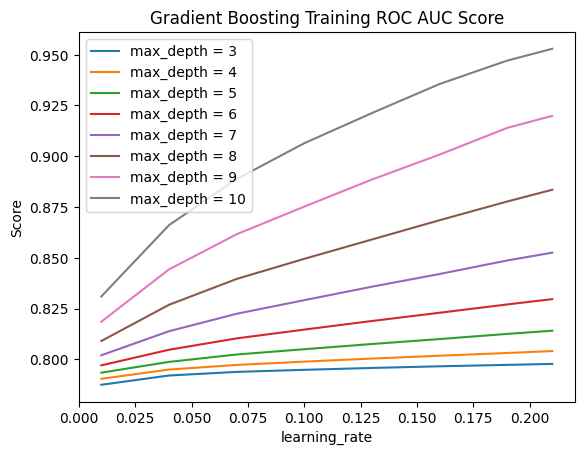

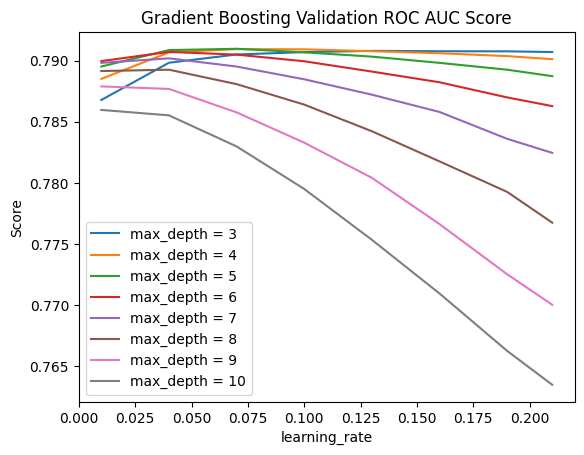

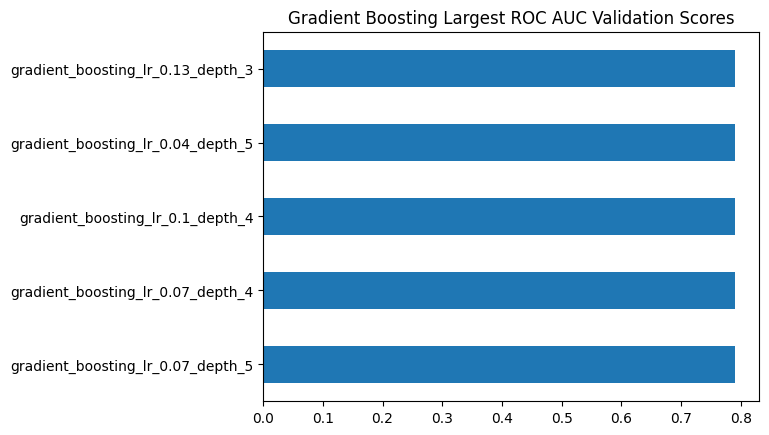

In [146]:
GBTraining = pd.read_csv("data/Gradient/Gradient_Training_Scores.csv")
GBValidation = pd.read_csv("data/Gradient/Gradient_Validation_Scores.csv")
max_depth = [3,4,5,6,7,8,9,10]
learning_rate = [.01,.04,.07,.1,.13,.16,.19,.21]

print('Top Model:'+str(GBValidation.mean().sort_values(ascending=False).head(1)))

plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_3':'gradient_boosting_lr_0.21_depth_3':8].mean(),label='max_depth = 3')
plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_4':'gradient_boosting_lr_0.21_depth_4':8].mean(),label='max_depth = 4')
plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_5':'gradient_boosting_lr_0.21_depth_5':8].mean(),label='max_depth = 5')
plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_6':'gradient_boosting_lr_0.21_depth_6':8].mean(),label='max_depth = 6')
plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_7':'gradient_boosting_lr_0.21_depth_7':8].mean(),label='max_depth = 7')
plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_8':'gradient_boosting_lr_0.21_depth_8':8].mean(),label='max_depth = 8')
plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_9':'gradient_boosting_lr_0.21_depth_9':8].mean(),label='max_depth = 9')
plt.plot(learning_rate,GBTraining.loc[:,'gradient_boosting_lr_0.01_depth_10':'gradient_boosting_lr_0.21_depth_10':8].mean(),label='max_depth = 10')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('Gradient Boosting Training ROC AUC Score')
plt.show()

plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_3':'gradient_boosting_lr_0.21_depth_3':8].mean(),label='max_depth = 3')
plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_4':'gradient_boosting_lr_0.21_depth_4':8].mean(),label='max_depth = 4')
plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_5':'gradient_boosting_lr_0.21_depth_5':8].mean(),label='max_depth = 5')
plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_6':'gradient_boosting_lr_0.21_depth_6':8].mean(),label='max_depth = 6')
plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_7':'gradient_boosting_lr_0.21_depth_7':8].mean(),label='max_depth = 7')
plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_8':'gradient_boosting_lr_0.21_depth_8':8].mean(),label='max_depth = 8')
plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_9':'gradient_boosting_lr_0.21_depth_9':8].mean(),label='max_depth = 9')
plt.plot(learning_rate,GBValidation.loc[:,'gradient_boosting_lr_0.01_depth_10':'gradient_boosting_lr_0.21_depth_10':8].mean(),label='max_depth = 10')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('Gradient Boosting Validation ROC AUC Score')
plt.show()

GBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Gradient Boosting Largest ROC AUC Validation Scores")

#Add Gradient Boosting Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('gradient_boosting_lr_0.07_depth_5',GradientBoostingClassifier(random_state=seed,learning_rate=0.07,max_depth=5)))

XGB Optimization

In [147]:
%%script echo skipping

XGB =[('XGBoost',XGBClassifier(random_state = seed))]
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)

XGBTrainScores,XGBValScores,XGBAccuracyScores,XGBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(learning_rate)):
    for j in range(len(max_depth)):
        XGB.append(('XGBoost_lr_'+str(learning_rate[i])+'_depth_'+str(max_depth[j]),XGBClassifier(random_state = seed,learning_rate=learning_rate[i],max_depth=max_depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in XGB:
    XGBTrainScores[model_name],XGBValScores[model_name],XGBAccuracyScores[model_name],XGBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

#XGBTrainScores.to_csv("data/XGBoost/XGBoost_Training_Scores.csv",index=False)
#XGBValScores.to_csv("data/XGBoost/XGBoost_Validation_Scores.csv",index=False)
#XGBAccuracyScores.to_csv("data/XGBoost/XGBoost_Accuracy_Scores.csv",index=False)
#XGBF1Scores.to_csv("data/XGBoost/XGBoost_F1_Scores.csv",index=False)

skipping


Top Model:XGBoost_lr_0.04941713361323833_depth_5    0.791193
dtype: float64


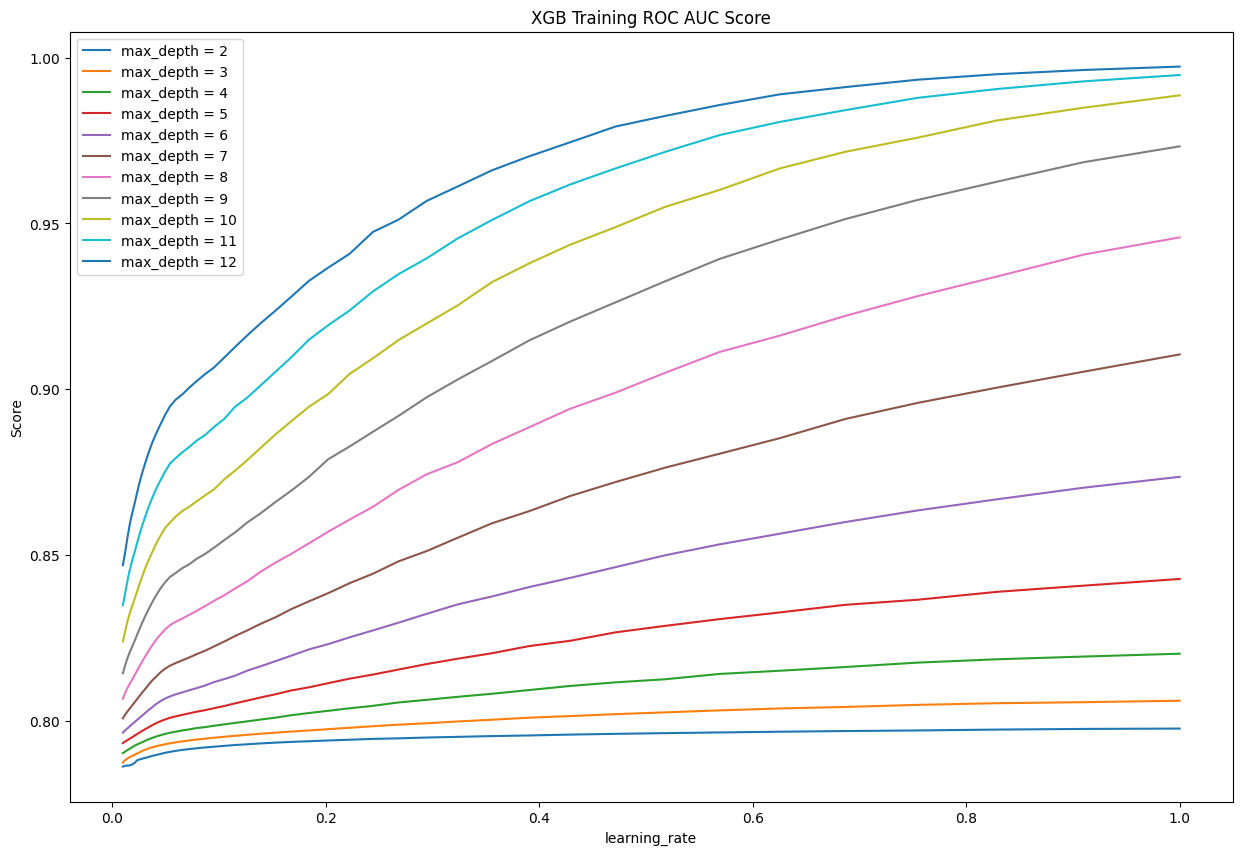

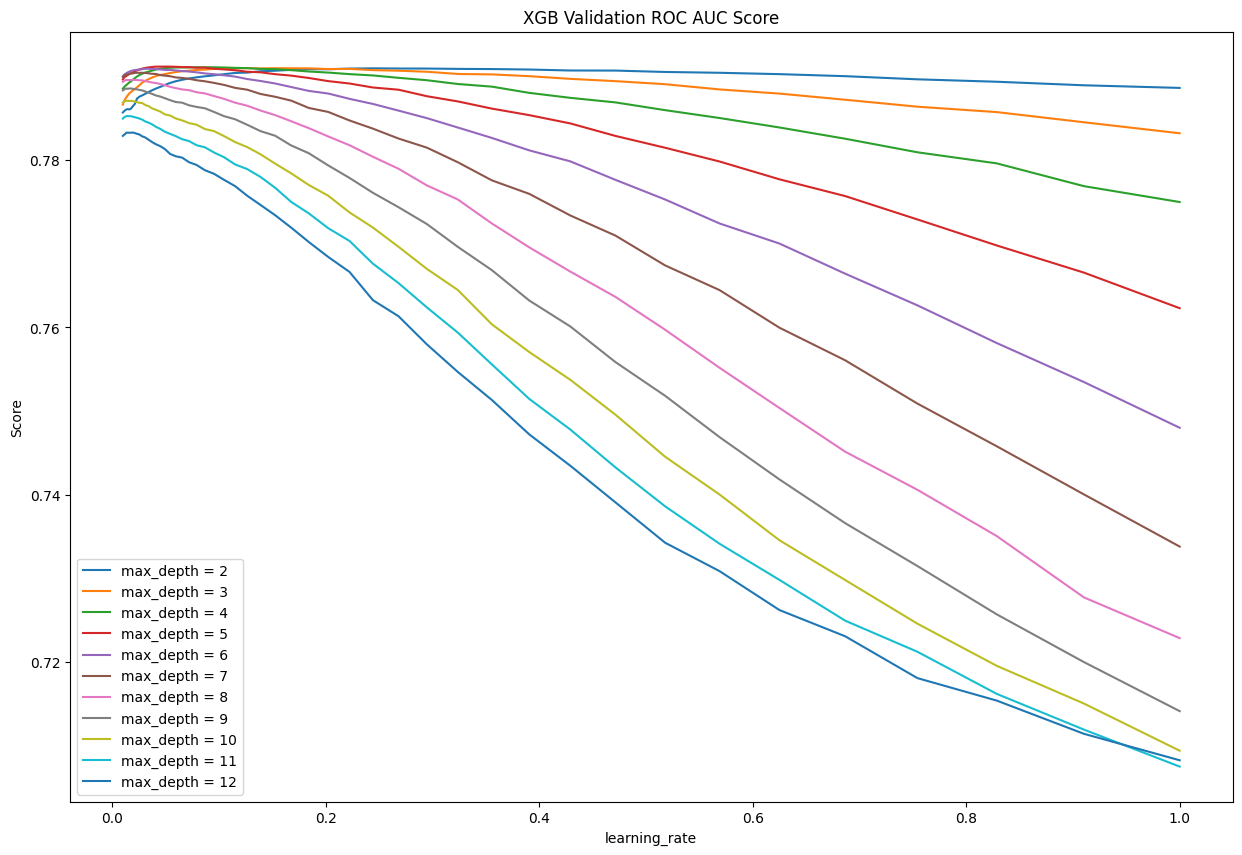

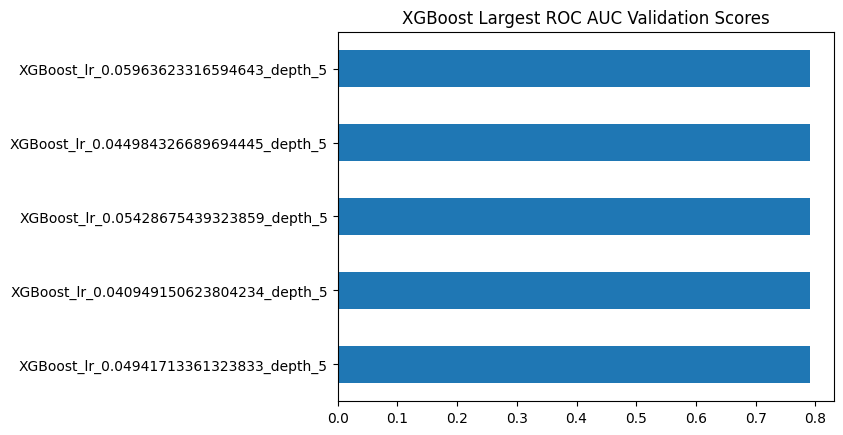

In [148]:
XGBTraining = pd.read_csv("data/XGBoost/XGBoost_Training_Scores.csv")
XGBValidation = pd.read_csv("data/XGBoost/XGBoost_Validation_Scores.csv")
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = np.logspace(-2,0)

print('Top Model:'+str(XGBValidation.mean().sort_values(ascending=False).head(1)))

plt.figure(figsize=(15,10))
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_2':'XGBoost_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_3':'XGBoost_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_4':'XGBoost_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_5':'XGBoost_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_6':'XGBoost_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_7':'XGBoost_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_8':'XGBoost_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_9':'XGBoost_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_10':'XGBoost_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_11':'XGBoost_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
plt.plot(learning_rate,XGBTraining.loc[:,'XGBoost_lr_0.01_depth_12':'XGBoost_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('XGB Training ROC AUC Score')
plt.show()

plt.figure(figsize=(15,10))
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_2':'XGBoost_lr_1.0_depth_2':11].mean(),label='max_depth = 2')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_3':'XGBoost_lr_1.0_depth_3':11].mean(),label='max_depth = 3')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_4':'XGBoost_lr_1.0_depth_4':11].mean(),label='max_depth = 4')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_5':'XGBoost_lr_1.0_depth_5':11].mean(),label='max_depth = 5')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_6':'XGBoost_lr_1.0_depth_6':11].mean(),label='max_depth = 6')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_7':'XGBoost_lr_1.0_depth_7':11].mean(),label='max_depth = 7')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_8':'XGBoost_lr_1.0_depth_8':11].mean(),label='max_depth = 8')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_9':'XGBoost_lr_1.0_depth_9':11].mean(),label='max_depth = 9')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_10':'XGBoost_lr_1.0_depth_10':11].mean(),label='max_depth = 10')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_11':'XGBoost_lr_1.0_depth_11':11].mean(),label='max_depth = 11')
plt.plot(learning_rate,XGBValidation.loc[:,'XGBoost_lr_0.01_depth_12':'XGBoost_lr_1.0_depth_12':11].mean(),label='max_depth = 12')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.title('XGB Validation ROC AUC Score')
plt.show()


XGBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="XGBoost Largest ROC AUC Validation Scores")

#Add XGBoost Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('XGBoost_lr_0.04941713361323833_depth_5',XGBClassifier(random_state=seed,learning_rate=0.04941713361323833,max_depth=5)))

Cat Boosting Optimization

In [149]:
%%script echo skipping
CB =[('CatBoost',CatBoostClassifier(random_state = seed, verbose=0))]
max_depth = [3,4,5,6,7,8,9,10,11,12]

CBTrainScores,CBValScores,CBAccuracyScores,CBF1Scores = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(len(max_depth)):
    CB.append(('CatBoost_depth_'+str(max_depth[i]),CatBoostClassifier(random_state = seed, verbose=0,max_depth=max_depth[i])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in CB:
    CBTrainScores[model_name],CBValScores[model_name],CBAccuracyScores[model_name],CBF1Scores[model_name] = crossValidation(X_train, y_train, make_pipeline(model), model_name, rskf)

CBTrainScores.to_csv("data/CatBoost/CatBoost_Training_Scores.csv",index=False)
CBValScores.to_csv("data/CatBoost/CatBoost_Validation_Scores.csv",index=False)
CBAccuracyScores.to_csv("data/CatBoost/CatBoost_Accuracy_Scores.csv",index=False)
CBF1Scores.to_csv("data/CatBoost/CatBoost_F1_Scores.csv",index=False)

skipping


Top Model:CatBoost_depth_3    0.791019
dtype: float64


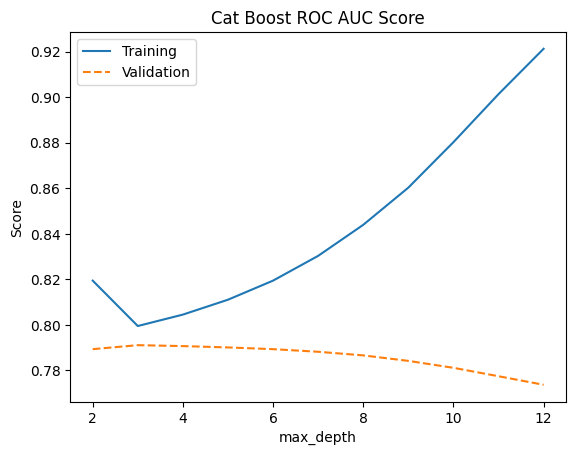

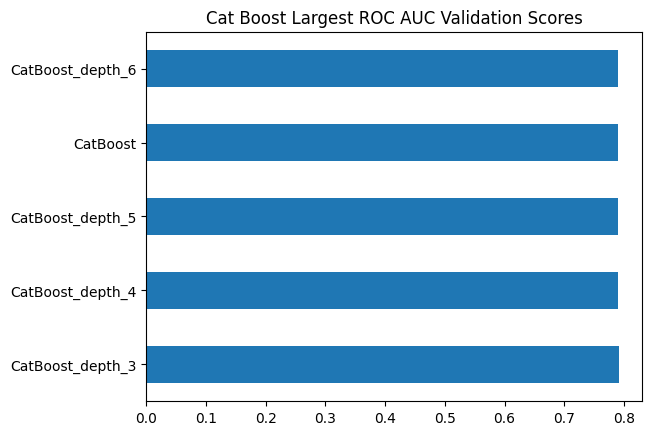

In [150]:
CBTraining = pd.read_csv("data/CatBoost/CatBoost_Training_Scores.csv")
CBValidation = pd.read_csv("data/CatBoost/CatBoost_Validation_Scores.csv")
max_depth = [2,3,4,5,6,7,8,9,10,11,12]
learning_rate = [.01,.04,.07,.1,.13,.16,.19,.21,.24,.27,.3]

print('Top Model:'+str(CBValidation.mean().sort_values(ascending=False).head(1)))

plt.plot(max_depth,CBTraining.mean(),label='Training')
plt.plot(max_depth,CBValidation.mean(),label='Validation',linestyle='--')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Cat Boost ROC AUC Score')
plt.show()


CBValidation.mean().sort_values(ascending=False).head().plot(kind="barh",title="Cat Boost Largest ROC AUC Validation Scores")

#Add Cat Boost Model with Largest Validation ROC AUC Score to the Optimal Models
optimalModel.append(('CatBoost_depth_3',CatBoostClassifier(random_state=seed,verbose=0,max_depth=3)))

In [151]:
print(f'Models Chosen through Cross Validation:\n{print(optimalModel)}')

[('GaussianNB_VS_1.0', GaussianNB(var_smoothing=1.0)), ('BernoulliNB_Alpha_0.25', BernoulliNB(alpha=0.25)), ('decision_tree_log_loss_depth_6', DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=10)), ('KNN_Neignbors_12', KNeighborsClassifier(n_neighbors=12)), ('logistic_regression_solver_liblinear_c_100', LogisticRegression(C=100, random_state=10, solver='liblinear')), ('random_forest_maxDepth_10_maxFeatures_sqrt', RandomForestClassifier(max_depth=10, random_state=10)), ('hist_gradient_boosting_lr_0.04941713361323833_depth_5', HistGradientBoostingClassifier(learning_rate=0.04941713361323833, max_depth=5,
                               random_state=10)), ('lgbm_maxDepth_4_leafNum_14', LGBMClassifier(max_depth=4, num_leaves=14, random_state=10)), ('gradient_boosting_lr_0.07_depth_5', GradientBoostingClassifier(learning_rate=0.07, max_depth=5, random_state=10)), ('XGBoost_lr_0.04941713361323833_depth_5', XGBClassifier(base_score=None, booster=None, callbacks=None,
    